## These are some helper functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.lines import Line2D
from scipy import stats
from matplotlib.patches import Polygon
from decimal import Decimal    
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch

from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn import metrics
import seaborn as sns

from numpy.random import seed
import _pickle as cPickle
from sklearn.metrics import matthews_corrcoef

random_seed = 0
seed(random_seed)

import itertools
from scipy.signal import argrelextrema

In [2]:
#These helper functions were also implemented in the C# code, however the python implementation was used to find the right features
def CFragDocking(HydrogenBonds,SBridges,Arom,vDW,SeqLen,range_before_after):

    ResultsEnergy = []
    Hbonds = []
    Sbridges = []
    Aromates = []
    vdw_forces = []
    Sum_forces = []
    
    ResultHBonds_x = []
    ResultHBonds_y = []
    HBondCons=[]

    HydrogenBonds = [str(i) for i in HydrogenBonds]
    for i in range(len(HydrogenBonds)):
        NoDistance = str(HydrogenBonds[i]).split("|")
        PartnersinBond2 = str(NoDistance[0]).split("-")
        PartnersinBond = [int(i.split(".")[0]) for i in PartnersinBond2]

        PartnerA = PartnersinBond[0]+1#Indexes are in the PartnersinBond so to get the real residue number we do +1
        PartnerB = PartnersinBond[1]+1

        Energy = 0
        Distance = float(NoDistance[1].replace(",","."))
        Angle = float(NoDistance[2].replace(",","."))
        if Angle <= 63 and Distance <= 3.5:#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8261469/
            if Distance <= 1.5:
                Energy = 115
            elif Distance <= 2.2:
                Energy = 40
            else:
                Energy = 17


            ResultsEnergy.append(float(Energy))

            if PartnerA < PartnerB:
                ResultHBonds_x.append(PartnersinBond[0]+1)
                ResultHBonds_y.append(PartnersinBond[1]+1)
            else:
                ResultHBonds_x.append(PartnersinBond[1]+1)
                ResultHBonds_y.append(PartnersinBond[0]+1)


    ResultSBridge_x = []
    ResultSBridge_y = []
    SBridgeCons = []
    SBridges = [str(i) for i in SBridges]
    for i in range(len(SBridges)):
        PartnersinBond2 = str(SBridges[i]).split("-")
        PartnersinBond = [int(i.split(".")[0]) for i in PartnersinBond2]

        PartnerA = PartnersinBond[0]+1
        PartnerB = PartnersinBond[1]+1
        

        if PartnerA < PartnerB:
            ResultSBridge_x.append(PartnersinBond[0]+1)
            ResultSBridge_y.append(PartnersinBond[1]+1)
        else:
            ResultSBridge_x.append(PartnersinBond[1]+1)
            ResultSBridge_y.append(PartnersinBond[0]+1)



    ResultAromBond_x = []
    ResultAromBond_y = []
    ResultAromValue = []
    
    AromCons=[]

    Arom = [str(i) for i in Arom]
    for i in range(len(Arom)):
        PartnersinBond2 = str(Arom[i]).split("-")
        PartnersinBond = [int(i.split(".")[0]) for i in PartnersinBond2]
        Energy = 9.6
        if type[0] == "CA" and type[1] == "CA": #pipi
            Energy = 9.4
        

        ResultAromValue.append(Energy)
        PartnerA = PartnersinBond[0]+1
        PartnerB = PartnersinBond[1]+1

        if PartnerA < PartnerB:
            ResultAromBond_x.append(PartnersinBond[0]+1)
            ResultAromBond_y.append(PartnersinBond[1]+1)
        else:
            ResultAromBond_x.append(PartnersinBond[1]+1)
            ResultAromBond_y.append(PartnersinBond[0]+1)


    ResultvDW_x = []
    ResultvDW_y = []
    
    VdWCons=[]

    vDW = [str(i) for i in vDW]
    for i in range(len(vDW)):
        PartnersinBond2 = str(vDW[i]).split("-")
        PartnersinBond = [int(i.split(".")[0]) for i in PartnersinBond2]

        PartnerA = PartnersinBond[0]+1
        PartnerB = PartnersinBond[1]+1
        
        if PartnerA < PartnerB:
            ResultvDW_x.append(PartnersinBond[0]+1)
            ResultvDW_y.append(PartnersinBond[1]+1)
        else:
            ResultvDW_x.append(PartnersinBond[1]+1)
            ResultvDW_y.append(PartnersinBond[0]+1)
    

    for split_site in range(1, SeqLen):
        #check all the residues from before the split:
        start_before = split_site-range_before_after
        if start_before < 1:
            start_before = 1

        start_after = split_site+range_before_after
        if start_after >= SeqLen:
            start_after = SeqLen

        start_before = 1#So basically the whole N Fragment is taken into account
        
        InterfaceHBonds = 0
        InterfaceSBridges = 0
        InterfaceAromatic = 0
        InterfacevDW = 0

        for i in range(start_before,split_site+1):
            if i in ResultHBonds_x:
                index_list = ResultHBonds_x.index(i)
                if ResultHBonds_y[index_list] > split_site and ResultHBonds_y[index_list] <= start_after:
                    InterfaceHBonds+=ResultsEnergy[index_list]
  
        for i in range(start_before,split_site+1):
            if i in ResultSBridge_x:
                index_list2 = ResultSBridge_x.index(i)
                if ResultSBridge_y[index_list2] > split_site and ResultSBridge_y[index_list2] <= start_after:
                    InterfaceSBridges+=20

        for i in range(start_before,split_site+1):
            if i in ResultAromBond_x:
                index_list2 = ResultAromBond_x.index(i)
                if ResultAromBond_y[index_list2] > split_site and ResultAromBond_y[index_list2] <= start_after:
                    InterfaceAromatic+=ResultAromValue[index_list2]
  
        for i in range(start_before,split_site+1):
            if i in ResultvDW_x:
                index_list = ResultvDW_x.index(i)
                if ResultvDW_y[index_list] > split_site and ResultvDW_y[index_list] <= start_after:
                    InterfacevDW+=6


        Sum_forces.append(InterfaceHBonds+InterfaceSBridges+InterfaceAromatic+InterfacevDW)
        split_site +=1
        

    return Sum_forces


#Statistics script for selecting the right test:
def Normality(data):
    isnormal = False
    alpha = 0.05
    stat, p = stats.shapiro(data)
    if p > alpha:
        isnormal = True
    if len(data) >= 20:
        stat2, p2 = stats.normaltest(data)
        if p2 > alpha:
            isnormal = True
    result = stats.anderson(data)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if sl==5:
            if result.statistic < result.critical_values[i]:
                isnormal = True
    return isnormal

def CheckSignificance(data1, data2):
    normal_data1 = Normality(data1)
    normal_data2 = Normality(data2)
    p_valuetest = 100
    if normal_data1 == True and normal_data2==True:
        #Unpaired t test
        print("Data 1:", str(normal_data1), "Data 2:",str(normal_data2), "-> T-test")
        p_valuetest = np.round(stats.ttest_ind(np.array(data1), np.array(data2),alternative='two-sided').pvalue,10)
    else:
        #MannU
        print("Data 1:", str(normal_data1), "Data 2:",str(normal_data2), "-> Mann Whiteney U")
        p_valuetest = np.round(stats.mannwhitneyu(data1, data2, alternative='two-sided').pvalue,10)
    return p_valuetest

#Box Plots functions
#Get Significance:
def annot_stat(pvalue, x1, x2, y, ax, col='k'):
    #h=height that gets added
    h_smaller = y*0.05
    h = y*0.1
    star = "ns"
    if pvalue <= 0.001:
        star = "***"
    elif pvalue <= 0.01:
        star = "**"
    elif pvalue <= 0.05:
        star = "*"
    ax = plt.gca() if ax is None else ax
    ax.plot([x1, x1, x2, x2], [y+h_smaller, y+h, y+h, y+h_smaller], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h, star, ha='center', va='bottom', color=col)

    
#Based upon the boxplot demo: https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
def MakeBoxPlot(title, y_label, ax, data, pvalue, ShowLegend = False, ShowIndividualPoints = False):#Data as a list
    bp = ax.boxplot(data)
    
    getMin = min([min(data[0]),min(data[1])])
    getMax = max([max(data[0]),max(data[1])])
    ChangeBy = getMax*0.2
    ax.set_ylim([getMin-ChangeBy, getMax+ChangeBy])#Add 20% to the top for the significance
    box_colors = ['lightskyblue', 'coral']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax.plot(median_x, median_y, 'k',zorder=3)
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax.plot(np.average(med.get_xdata()), np.average(data[i]),
                color='w', marker='*', markeredgecolor='k',zorder=3)
        
    #also add all the datapoints
    if ShowIndividualPoints == True:
        ax.scatter(np.ones(len(data[0]))*1, data[0],c=box_colors[0], alpha=0.25, edgecolors='black',zorder=2)
        ax.scatter(np.ones(len(data[1]))*2, data[1],c=box_colors[1], alpha=0.25, edgecolors='black',zorder=2)
    
    annot_stat(pvalue, 1, 2, getMax, ax)
    
    colors = {'Active':'lightskyblue', 'Inactive':'coral'}
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    if ShowLegend == True:
        ax.legend(handles, labels, loc="best")
    width = 0.35
    ax.set_ylabel(y_label)
    ax.set_xticklabels(['Active', 'Inactive'])
    ax.set_title(title, fontsize=10)

In [3]:
#This is the function that calculates the spatial conservation:
from Bio.PDB import PDBParser

#proteins = ["4kl5_NpuDnaE_Final_Mutated.pdb","Aes123_792ca_unrelaxed_rank_1_model_5.pdb","6qaz_Gp41-1_Final_Mutated.pdb"]
#proteins = ["D:/Git_Model/Intein_Paper_and_ML_Stuff_backups/InteinModel_WithRightDataSet/Inteins/Original_Files_FINAL/" + str(a) for a in proteins]

def SpatialConservation(Rate4Site, proteinfile, split_site_index, distance_threshold):
    parser = PDBParser()
    # Parse the PDB file
    structure = parser.get_structure('InteinStructure', proteinfile)
    # Extract CA atoms and their indices
    ca_atoms = []
    ca_indices = []
    for model in structure:
        for chain in model:
            for i, residue in enumerate(chain):
                if 'CA' in residue:
                    ca_atom = residue['CA']
                    ca_atoms.append(ca_atom)
                    ca_indices.append(i)

    if len(Rate4Site) != len(ca_atoms):
        print("Incomplete mapping")
        return None
    # Calculate midpoint between center_residue_index and center_residue_index + 1
    ca_atom_1 = ca_atoms[split_site_index].get_coord()
    ca_atom_2 = ca_atoms[split_site_index + 1].get_coord()
    center_ca_atom = (ca_atom_1 + ca_atom_2) / 2
    # Calculate distances and find neighbors
    neighbors_values = []
    for i, ca_atom in enumerate(ca_atoms):
        distance = np.linalg.norm(center_ca_atom - ca_atom.get_coord())
        if distance <= distance_threshold:
            neighbors_values.append(Rate4Site[ca_indices[i]])
    # Calculate mean value of neighbors' values
    if neighbors_values:
        min_value = np.min(neighbors_values)
        mean_value = np.mean(neighbors_values)
        max_value = np.max(neighbors_values)
    else:
        min_value=0.5
        mean_value = 0.5
        max_value = 0.5
        print("No neighbors found within threshold.")
    return min_value, mean_value, max_value

In [4]:
#This is for the SPELL-like Binding Affinity function implementation (https://doi.org/10.1038/s41467-018-06531-4)
def SPELL_Affinity_Graph(splitBindingAffinity_original):    
    smoothBindingAffinity = []
    smoothBindingAffinityNew = []
    smoothBindingAffinityNorm = []
    
    ScrollingWindowSize = 0
    x = range(1,len(splitBindingAffinity_original)+1)
    for i in range(0, len(splitBindingAffinity_original)):
        if i < ScrollingWindowSize:
            b_aff_mean_norm = sum(splitBindingAffinity[0:i+ScrollingWindowSize+1])/len(splitBindingAffinity[0:i+ScrollingWindowSize+1])
        else:
            b_aff_mean_norm = sum(splitBindingAffinity[i-ScrollingWindowSize:i+ScrollingWindowSize+1])/len(splitBindingAffinity[i-ScrollingWindowSize:i+ScrollingWindowSize+1])
        smoothBindingAffinityNorm.append(b_aff_mean_norm)
        
    deriv_x = (np.array(x)[:-1] + np.array(x)[1:]) / 2    
    deriv_y_norm = np.diff(smoothBindingAffinityNorm) / np.diff(x)       
    
    smoothBindingAffinity = splitBindingAffinity_original[:]
    for a in range(0,5):#Smoothing is repeated 5 times
        ScrollingWindowSize = 3
        x=range(1,len(smoothBindingAffinity)+1)
        for i in range(0, len(smoothBindingAffinity)):
            if i < ScrollingWindowSize:
                b_aff_mean = sum(smoothBindingAffinity[0:i+ScrollingWindowSize+1])/len(smoothBindingAffinity[0:i+ScrollingWindowSize+1])
            else:
                b_aff_mean = sum(smoothBindingAffinity[i-ScrollingWindowSize:i+ScrollingWindowSize+1])/len(smoothBindingAffinity[i-ScrollingWindowSize:i+ScrollingWindowSize+1])
            smoothBindingAffinityNew.append(b_aff_mean)
        smoothBindingAffinity = []
        smoothBindingAffinity = smoothBindingAffinityNew[:]
        smoothBindingAffinityNew = []
    
    fig, axs = plt.subplots(1, 5)
    
    fig.set_size_inches(22, 3)
    
    fig.set_tight_layout("pad")
    
    axs[0].set_ylabel("Binding affinity [kcal*mol-1]")
    axs[1].set_ylabel("Binding affinity' [(kcal*mol-1) per residue]")
    axs[2].set_ylabel("Binding affinity' [(kcal*mol-1) per residue]")
    axs[3].set_ylabel("Binding affinity' [(kcal*mol-1) per residue]")
    axs[4].set_ylabel("Binding affinity' [(kcal*mol-1) per residue]")
    
    axs[0].set_xlabel("Split site")
    axs[1].set_xlabel("Split site")
    axs[2].set_xlabel("Split site")
    axs[3].set_xlabel("Split site")
    axs[4].set_xlabel("Split site")
    
    axs[0].set_title("Binding affinity smoothing #1")
    axs[0].plot(x, splitBindingAffinity_original, color="gold", label='Binding affinity')
    axs[0].plot(x, smoothBindingAffinity, color="limegreen", label='Smoothed binding affinity')
    legend0 = axs[0].legend()
    add_patch(legend0, "Minimum", "turquoise")
    
    local_minima = argrelextrema(np.array(smoothBindingAffinity), np.less)[0]
    for i in local_minima:
        axs[0].axvline(x=i+1, color="turquoise")
        axs[1].axvline(x=i+1, color="turquoise")
        axs[2].axvline(x=i+1, color="turquoise")
        axs[3].axvline(x=i+1, color="turquoise")
        axs[4].axvline(x=i+1, color="turquoise")

    #https://stackoverflow.com/questions/52957623/how-to-plot-the-derivative-of-a-plot-python
    deriv_y = np.diff(smoothBindingAffinity) / np.diff(x)
    #To compute your derivative (note here that data['y_p'] will be of size n-1, therefore data['y_p'][i] is actually an approximation of the derivative at (data['x'][i] + data['x'][i+1]) / 2):
    axs[1].set_title("Group derivative into intervals #2")
    axs[1].plot(deriv_x, deriv_y, color="darkviolet", label='Binding affinity\'')
    legend1 = axs[1].legend()
    add_patch(legend1, "Interval", "lemonchiffon", True)
    #get intervals with a specific derivative
    E_cutoff = 0.5
    intervalListIdx = []
    Found_NewInterval = False
    start_index = 0
    end_index = 0
    for i in range(0,len(deriv_y)):
        current_deriv = deriv_y[i]
        if abs(current_deriv) < E_cutoff:
            if Found_NewInterval == True:
                end_index = i
            else:
                Found_NewInterval = True
                start_index = i
                end_index = i
        else:
            if Found_NewInterval == True:
                #add new interval to list
                intervalListIdx.append([start_index,end_index])
                axs[1].axvspan(deriv_x[start_index], deriv_x[end_index], facecolor='yellow', alpha=0.1)
            Found_NewInterval = False
    
    axs[2].set_title("Extension of intervals #3")
    axs[2].plot(deriv_x, deriv_y, color="darkviolet", label='Binding affinity\'')
    legend2 = axs[2].legend()
    add_patch(legend2, "Extended interval", "peachpuff", True)
    Etr = abs(min(smoothBindingAffinity))/20
    
    #extend intervals:
    intervalListIdxExtended = []
    for interval in intervalListIdx:
        GetBinding_start = smoothBindingAffinity[interval[0]]
        GetBinding_end = smoothBindingAffinity[interval[1]]
        index_start = interval[0]
        index_end = interval[1]
        Extend_Start = True
        Extend_End = True
        while Extend_Start == True:
            GetBinding_extend_start = smoothBindingAffinity[index_start-1]
            if abs(GetBinding_extend_start-GetBinding_start) < Etr and index_start > 0:
                index_start -= 1
            else:
                Extend_Start = False
        while Extend_End == True:
            GetBinding_extend_end = smoothBindingAffinity[index_end+1]
            if abs(GetBinding_extend_end-GetBinding_end) < Etr and index_end <= len(smoothBindingAffinity)-1:
                index_end+=1
            else:
                Extend_End = False
        intervalListIdxExtended.append([index_start,index_end])
        axs[2].axvspan(deriv_x[index_start], deriv_x[index_end], facecolor='orange', alpha=0.1)
    
    axs[3].set_title("Merge overlapping intervals #4")
    axs[3].plot(deriv_x, deriv_y, color="darkviolet", label='Binding affinity\'')
    legend3 = axs[3].legend()
    add_patch(legend3, "Merged interval", "pink", True)
    
    #check for overlapping intervals:
    intervalListIdxExtendedOverlaps = []
    new_start = -1
    new_end = -1
    LastOverlap = False
    for idx in range(0,len(intervalListIdxExtended)):
        #GetRange_of current index
        #print(intervalListIdxExtended[idx])
        Curr_start = intervalListIdxExtended[idx][0]
        Curr_end = intervalListIdxExtended[idx][1]
        #Next stuff:
        if idx < len(intervalListIdxExtended)-1:
            Next_start = intervalListIdxExtended[idx+1][0]
            Next_end = intervalListIdxExtended[idx+1][1]
        else:
            Next_start = -1
            Next_end = -1
        #range After
        if Curr_end >= Next_start and idx < len(intervalListIdxExtended)-1:
            #overlap found, so we merge 
            #print("found overlap between", intervalListIdxExtended[idx],"and", intervalListIdxExtended[idx+1], "->", Curr_end,">=", Next_start)
            if LastOverlap == True:
                new_end = Next_end
            else:
                new_start = Curr_start
                new_end = Next_end
                LastOverlap = True
        else:
            #no overlap found
            LastOverlap = False#Overlap end
            if new_start == -1 and new_end == -1:
                intervalListIdxExtendedOverlaps.append([Curr_start,Curr_end])
                axs[3].axvspan(deriv_x[Curr_start], deriv_x[Curr_end], facecolor='red', alpha=0.1)
            else:    
                intervalListIdxExtendedOverlaps.append([new_start,new_end])
                axs[3].axvspan(deriv_x[new_start], deriv_x[new_end], facecolor='red', alpha=0.1)
                new_start = -1
                new_end = -1

    #The intervals corresponding to minima of the energy profile are discarded. We also discard the first and last intervals if their borders include the first or the last residues of the protein.
    axs[4].set_title("Discard intervals with minima #5")
    axs[4].plot(deriv_x, deriv_y, color="darkviolet", label='Binding affinity\'')
    legend4 = axs[4].legend()
    add_patch(legend4, "Final interval", "salmon", True)
    
    final_Intervals = []
    for interval in intervalListIdxExtendedOverlaps:
        if interval[0] != 0 and interval[1] != len(smoothBindingAffinity)-1:
            Minimum = False
            int_range = range(interval[0],interval[1]+1)
            for minima in local_minima:
                if minima in int_range:
                    Minimum = True
                    #discard
            if Minimum == False:
                final_Intervals.append(interval)
                axs[4].axvspan(deriv_x[interval[0]], deriv_x[interval[1]], facecolor='red', alpha=0.25)
        else:
            print("first last deleted")
            
    plt.show()
    
    return final_Intervals

## Feature selection

In [22]:
#Load in the efficiencies of all sites
file_efficiency ="ReadEfficiencies.xlsx"#3 Inteins are Aes, Npu, Gp41
df_splits = pd.read_excel(file_efficiency)
df_splits.dropna(inplace=True)
#Load in the csv with the data generated through the backend
file_gen ="final_training_data.csv"#3 Inteins are Aes, Npu, Gp41
df_gen =  pd.read_csv(file_gen, sep='\t', index_col=False)
df_gen.dropna(inplace=True)

The following Intein is being analysed: Npu
first last deleted


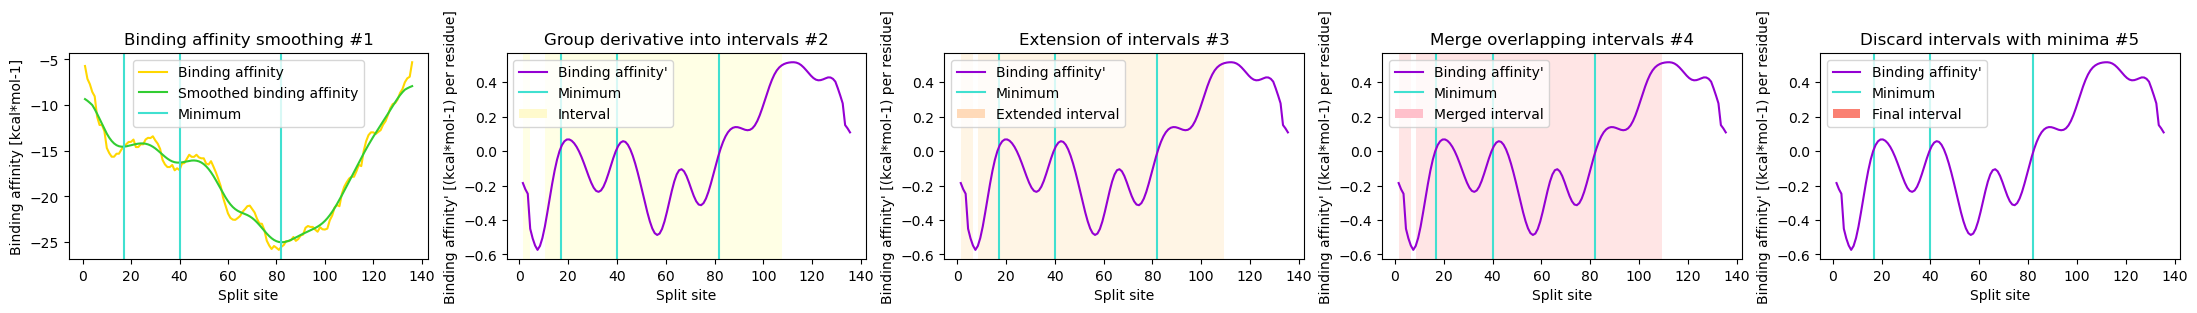

Added Cons 0 at this site 133
Added Relasa 0 at this site 133
The following Intein is being analysed: Gp41
first last deleted


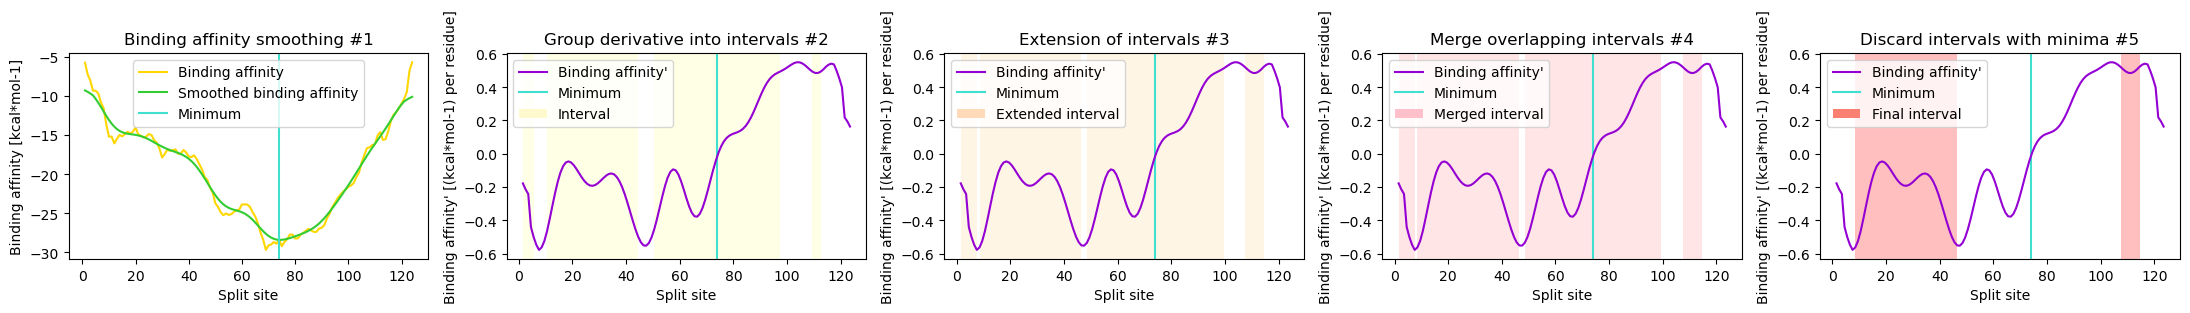

The following Intein is being analysed: Aes
first last deleted


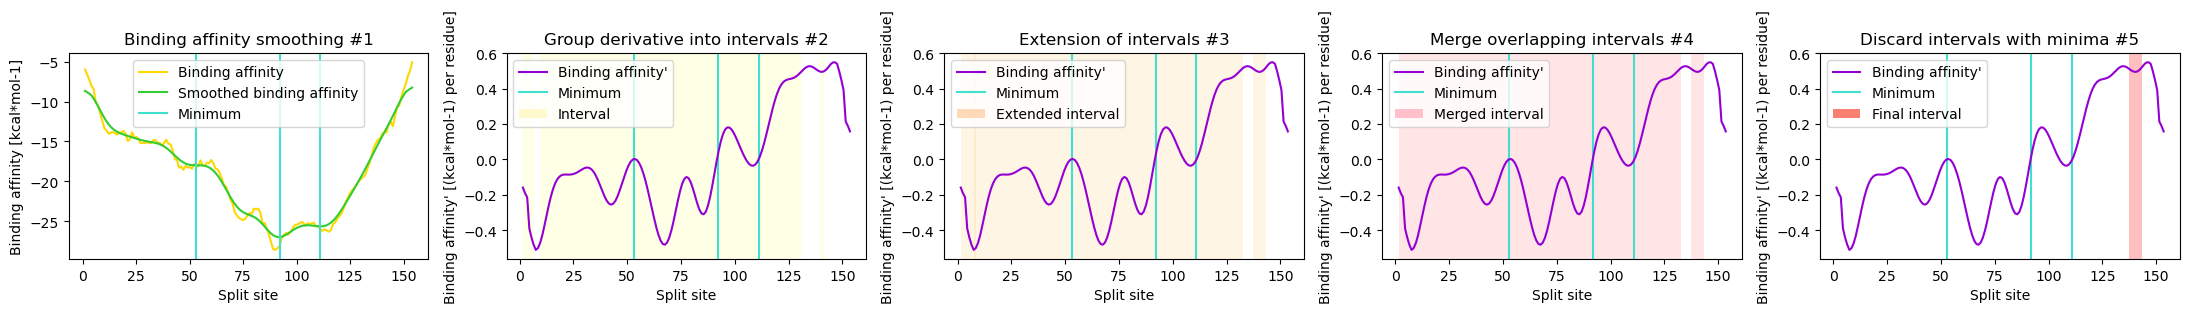

Added Cons 0 at this site 151
Added Relasa 0 at this site 151


In [23]:
#These functions populate the df_splits df with all the features
InteinNames = ["Npu", "Aes", "Gp41"]
CFragDocking_rangeBeforeAfter = 8#How many residues are considered for 

#Add new columns to dataframe
df_splits["PDBName"] = ""
df_splits["Sequence"] = ""
df_splits["Cons"] = ""
df_splits["BAff"] = ""
df_splits["RelASA"] = ""
df_splits["CFragDocking"] = ""
df_splits["SecStructure"] = ""
df_splits["ConsPosition"] = ""
df_splits["SPELL"] = ""

df_splits["Active"] = ""#0=no, 1= yes
df_splits["ConsTest"] = ""
df_splits["RealASATest"] = ""
df_splits["DockingTest"] = ""
df_splits["SecStrTest"] = ""
df_splits["CFragConsDockingTest"] = ""

#This is from here: https://stackoverflow.com/questions/55896058/add-item-to-existing-matplotlib-legend
def add_patch(legend, label, colorsel, patch=False):
    ax = legend.axes
    handles, labels = ax.get_legend_handles_labels()
    handles.append(Line2D([0], [0], color="turquoise"))
    labels.append("Minimum")
    if patch == True:
        handles.append(Patch(facecolor=colorsel))
        labels.append(label)

    legend._legend_box = None
    legend._init_legend_box(handles, labels)
    legend._set_loc(legend._loc)
    legend.set_title(legend.get_title().get_text())

for index_gen, row_gen in df_gen.iterrows():
    current_Intein = str(row_gen["PDBName"])
    print("The following Intein is being analysed:", current_Intein)
    residueConservation = row_gen["Conservation [Residue]"].split(";")
    residueConservation = [float(i.replace(",",".")) for i in residueConservation]
    
    #Normalize, negative values are divided up to 0.5 (conserved)
    #positive values from 0.5 to 1 (with 1 being max) (nonconserved)
    PositiveValues = [i for i in residueConservation if i > 0]
    NegativeValues = [i for i in residueConservation if i <= 0]
    max_PosValues = max(PositiveValues)
    min_PosValues = min(PositiveValues)
    max_NegValues = max(NegativeValues)
    min_NegValues = min(NegativeValues)
    residueConservation = [(1-(i-min_PosValues)/(max_PosValues-min_PosValues))*0.5 if i >= 0 else (1-(i-min_NegValues)/(max_NegValues-min_NegValues))*0.5+0.5 for i in residueConservation]#1=Conserved, 0=Non-conserved

    #BindingAffinity
    splitBindingAffinity = row_gen["BindingAffinity [Split]"].split(";")
    splitBindingAffinity = [float(i.replace(",",".")) for i in splitBindingAffinity]
    splitBindingAffinity_original = [i for i in splitBindingAffinity]
    minBindAff = min(splitBindingAffinity_original)
    if minBindAff == 0:
        minBindAff=1
    splitBindingAffinity = [i/minBindAff for i in splitBindingAffinity_original]
   
    #SPELL Graph & allowed intervals
    final_Intervals = SPELL_Affinity_Graph(splitBindingAffinity_original)
    #resASA
    residuerelASA = row_gen["RelASA [Residue]"].split(";")
    residuerelASA = [float(i.replace(",",".")) for i in residuerelASA]
    #Secondary Structure
    SecStr = str(row_gen["Sec Structure [Residue]"])
    #C-FragmentDocking
    HydrogenBonds = str(row_gen["HydrogenBonds"]).split(";")
    SBridges = str(row_gen["SBridges"]).split(";")
    Arom = str(row_gen["Arom"]).split(";")
    vDW = str(row_gen["vDW"]).split(";")
    
    SeqLen = len(str(row_gen["Sequence"]))
    SumCFragDockingResult = CFragDocking(HydrogenBonds,SBridges,Arom,vDW,SeqLen,CFragDocking_rangeBeforeAfter)
    
    DockingResultList = []
    for i in range(1,15):#Generate CFragDocking energy for several lengths
        DockingResultList.append(CFragDocking(HydrogenBonds,SBridges,Arom,vDW,SeqLen,i))
        
    #Now go through all te split sites
    for index_split, row_split in df_splits.iterrows():
        if row_split["Intein"] == current_Intein:
            split_site = int(str(row_split["Site"]).replace("N", ""))
            df_splits.loc[index_split, 'PDBName'] = str(row_gen["PDBName"])
            df_splits.loc[index_split, 'Sequence'] = str(row_gen["Sequence"])
            #These are the final Features used in the model
            df_splits.loc[index_split, 'Cons'] = (residueConservation[split_site-1]+residueConservation[split_site]+residueConservation[split_site+2])/3
            df_splits.loc[index_split, 'BAff'] = splitBindingAffinity[split_site-1]
            df_splits.loc[index_split, 'RelASA'] = (residuerelASA[split_site-2]+residuerelASA[split_site])/2
            df_splits.loc[index_split, 'CFragDocking'] = SumCFragDockingResult[split_site-1]
            issecstr = 0
            if SecStr[split_site-1] == "b" and SecStr[split_site] == "b":
                issecstr = 1
            df_splits.loc[index_split, 'SecStructure'] = issecstr
            efficiency = float(str(row_split["Efficiency"]).replace(",", "."))
            acitve = 0
            if efficiency > 0:
                acitve = 1
            df_splits.loc[index_split, 'Active'] = acitve
            #Now also some feature varriations are generated for fine tuning the features
            #SPELL Energy
            SPELL_SplitSite = 0.0#No
            for interval in final_Intervals:
                inter_range_idx = range(interval[0],interval[1]+1)
                if split_site-1 in inter_range_idx:
                    SPELL_SplitSite = 1.0#Yes
            df_splits.loc[index_split, 'SPELL'] = SPELL_SplitSite
            #Here we have the problem that 2 split sites do not have enough residues so here we set conservation to 0
            single_split_dataset_cons = []
            for cons in residueConservation[split_site-5:split_site+5]:
                single_split_dataset_cons.append(str(cons))
            if len(residueConservation[split_site-5:split_site+5]) != 10:
                print("Added Cons 0 at this site", split_site)
                single_split_dataset_cons.append(str(0))
            add_cons = ";".join(single_split_dataset_cons)
            add_cons += ";" + str((residueConservation[split_site-1]+residueConservation[split_site]+residueConservation[split_site+1]+residueConservation[split_site+2])/4)
            add_cons += ";" + str((residueConservation[split_site]+residueConservation[split_site+1]+residueConservation[split_site+2])/3)
            add_cons += ";" + str((residueConservation[split_site-1]+residueConservation[split_site]+residueConservation[split_site+2])/3)
            add_cons += ";" + str((residueConservation[split_site]+residueConservation[split_site+2])/2)
            df_splits.loc[index_split, 'ConsTest'] = add_cons
            #Do the same for Relative accessible surface area
            single_split_dataset_reslasa = []
            for relasa in residuerelASA[split_site-5:split_site+5]:
                single_split_dataset_reslasa.append(str(relasa))
            if len(residuerelASA[split_site-5:split_site+5]) != 10:
                print("Added Relasa 0 at this site", split_site)
                single_split_dataset_reslasa.append(str(0))
            add_relasa = ";".join(single_split_dataset_reslasa)
            add_relasa += ";" + str((residuerelASA[split_site-2]+residuerelASA[split_site-1]+residuerelASA[split_site])/3)
            add_relasa += ";" + str((residuerelASA[split_site-2]+residuerelASA[split_site])/2)
            df_splits.loc[index_split, 'RealASATest'] = add_relasa
            #CFragDocking
            DockingResult = []
            for i in range(0,14):
                DockingResult.append(str(DockingResultList[i][split_site-1]))
            add_docking = ";".join(DockingResult)
            df_splits.loc[index_split, 'DockingTest'] = add_docking

Scores [ 0.84459661  0.15271066  0.87807079  0.91395812  5.66725365 11.97604715
  3.39756973  9.44973414  3.02312382  0.81858165 20.31403451 17.40127686
 23.10238463 18.5576841 ]
P-Values [3.59869694e-01 6.96628883e-01 3.50552106e-01 3.40926504e-01
 1.88072946e-02 7.39678721e-04 6.76804398e-02 2.59759094e-03
 8.45671882e-02 3.67349685e-01 1.50017832e-05 5.64283837e-05
 4.35694583e-06 3.32055926e-05]


C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\2006332019.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_axis, rotation=90)


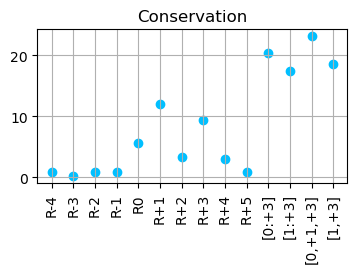

Scores [12.36674641]
P-Values [0.00061133]


C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\2006332019.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_axis, rotation=90)


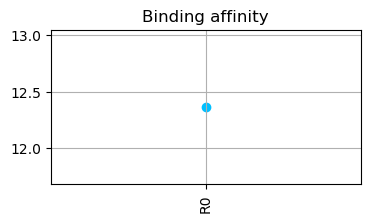

Scores [8.60287536]
P-Values [0.00399896]


C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\2006332019.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_axis, rotation=90)


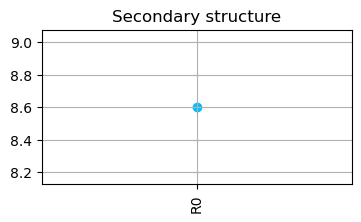

Scores [1.18720543e-02 1.93410101e-01 1.09145037e+00 2.31870285e+01
 1.17439041e+01 2.64669017e+01 4.72421658e+00 3.20905648e+00
 6.69537130e-01 2.97299772e+00 4.04237491e+01 4.15598409e+01]
P-Values [9.13411170e-01 6.60858992e-01 2.98182437e-01 4.19836693e-06
 8.28729029e-04 1.01774835e-06 3.16409326e-02 7.56709118e-02
 4.14782672e-01 8.71568192e-02 3.55922514e-09 2.29976636e-09]


C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\2006332019.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_axis, rotation=90)


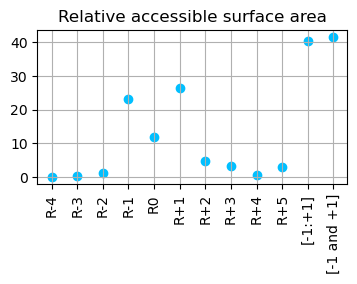

C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\2006332019.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_axis, rotation=90)


Scores [0.83385399 0.05292305 0.4155545  0.68432119 1.6985806  2.22641012
 3.05336247 3.99084557 3.87682787 3.64565468 2.57336782 2.4485388
 2.78975445 3.28725269]
P-Values [0.36293252 0.81843192 0.52035442 0.40969181 0.19488847 0.13820857
 0.08304579 0.04793666 0.05118725 0.05852611 0.11122019 0.12018285
 0.09739114 0.07223857]


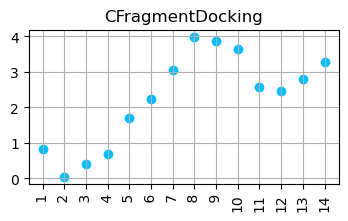

In [24]:
def MakePlotFeature(df_splits, feature_name, x_axis, title):
    if len(str(df_splits[feature_name][0]).split(";")) > 1:
        feature = np.array([np.array([float(i2) for i2 in i.split(";")]) for i in df_splits[feature_name]])
    else:
        feature = np.array([float(i) for i in df_splits[feature_name]])
        feature = feature.reshape(-1, 1)
    
    output = np.array([int(i) for i in df_splits["Active"]])
    selector = SelectKBest(f_classif, k="all")#f_classif (Anova), chi2, f_regression
    selected_features = selector.fit_transform(feature,output)
    print("Scores", selector.scores_)
    print("P-Values", selector.pvalues_)
    fig, ax = plt.subplots(figsize=(1, 1))
    fig.set_size_inches(4, 2)
    ax.set_title(title)
    ax.set_xticklabels(x_axis, rotation=90)
    ax.scatter(x_axis, selector.scores_, color="deepskyblue")
    ax.grid()
    plt.show()

#Feature selection Plots
predictors = ["R-4", "R-3", "R-2", "R-1", "R0", "R+1", "R+2", "R+3", "R+4", "R+5", "Range: -2:+2", "Range: -1:+3", "Range: 0:+3", "-1,1,3", "-1,3", "Range: 0:+4"]

MakePlotFeature(df_splits, "ConsTest", ["R-4", "R-3", "R-2", "R-1", "R0", "R+1", "R+2", "R+3", "R+4", "R+5", "[0:+3]", "[1:+3]","[0,+1,+3]","[1,+3]"], "Conservation")
MakePlotFeature(df_splits, "BAff", ["R0"], "Binding affinity")
MakePlotFeature(df_splits, "SecStructure", ["R0"], "Secondary structure")
MakePlotFeature(df_splits, "RealASATest", ["R-4", "R-3", "R-2", "R-1", "R0", "R+1", "R+2", "R+3", "R+4", "R+5", "[-1:+1]","[-1 and +1]"], "Relative accessible surface area")
MakePlotFeature(df_splits, "DockingTest", ["{:2d}".format(x) for x in range(1,15)], "CFragmentDocking")
#MakePlotFeature(df_splits, "ConsPosition", range(1,15), "Spatial Conservation")

Data 1: False Data 2: True -> Mann Whiteney U
Data 1: True Data 2: True -> T-test
Data 1: True Data 2: False -> Mann Whiteney U
Data 1: True Data 2: True -> T-test
Data 1: False Data 2: False -> Mann Whiteney U
Data 1: False Data 2: False -> Mann Whiteney U
BindingAffinitySignificance: 0.0009297776
ConservationSignificance: 4.3569e-06
RelASASignificance: 2.09e-08
CFragDockingSignificance: 0.0479366579
SecStrSignificance: 0.0044427229
SPELL: 0.8528033561


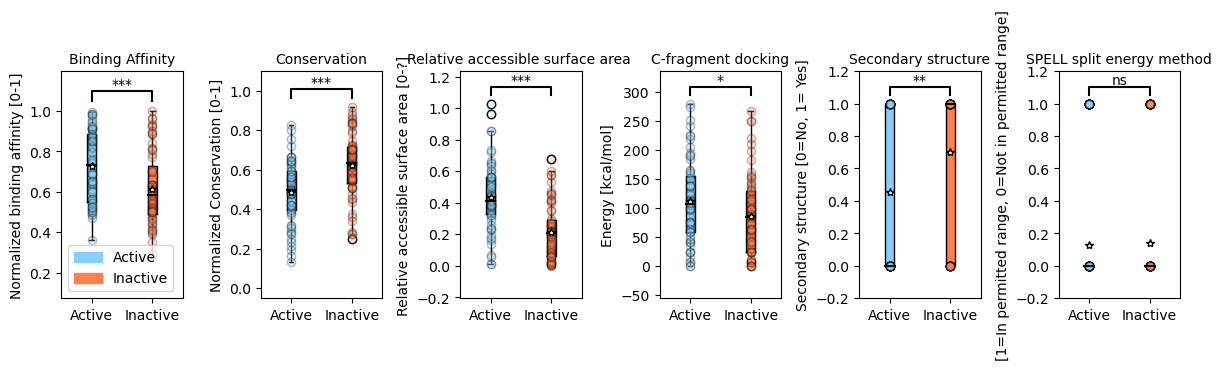

In [25]:
# Now we go for the selected features for their significance
fig, ax = plt.subplots(1,6)
fig.set_size_inches(12, 3)

BindingAffinityActive = []
BindingAffinityInActive = []
ConservationActive = []
ConservationInActive = []
RelAsaActive = []
RelAsaInActive = []
CFragDockingActive = []
CFragDockingInActive = []
SecStructureActive = []
SecStructureInActive = []
SPELLActive = []
SPELLInActive = []

for index_split, row_split in df_splits.iterrows():
    isactive = row_split["Active"]
    if isactive == 1:
        BindingAffinityActive.append(row_split["BAff"])
        ConservationActive.append(row_split["Cons"])
        RelAsaActive.append(row_split["RelASA"])
        CFragDockingActive.append(row_split["CFragDocking"])
        SecStructureActive.append(row_split["SecStructure"])
        SPELLActive.append(row_split["SPELL"])
    else:
        BindingAffinityInActive.append(row_split["BAff"])
        ConservationInActive.append(row_split["Cons"])
        RelAsaInActive.append(row_split["RelASA"])
        CFragDockingInActive.append(row_split["CFragDocking"])
        SecStructureInActive.append(row_split["SecStructure"])
        SPELLInActive.append(row_split["SPELL"])

pvalue_BindAff = CheckSignificance(BindingAffinityActive, BindingAffinityInActive)        
pvalue_Cons = CheckSignificance(ConservationActive, ConservationInActive)
pvalue_relASA = CheckSignificance(RelAsaActive, RelAsaInActive)
pvalue_CFragDocking = CheckSignificance(CFragDockingActive, CFragDockingInActive)
pvalue_SecStr = CheckSignificance(SecStructureActive, SecStructureInActive)
pvalue_spell = CheckSignificance(SPELLActive, SPELLInActive)

print("BindingAffinitySignificance:", pvalue_BindAff)
print("ConservationSignificance:", pvalue_Cons)    
print("RelASASignificance:", pvalue_relASA) 
print("CFragDockingSignificance:", pvalue_CFragDocking)
print("SecStrSignificance:", pvalue_SecStr)
print("SPELL:", pvalue_spell)

MakeBoxPlot("Binding Affinity", "Normalized binding affinity [0-1]", ax[0], [BindingAffinityActive,BindingAffinityInActive], pvalue_BindAff, True, True)
MakeBoxPlot("Conservation", "Normalized Conservation [0-1]", ax[1], [ConservationActive,ConservationInActive], pvalue_Cons, False, True)
MakeBoxPlot("Relative accessible surface area ", "Relative accessible surface area [0-?]", ax[2], [RelAsaActive,RelAsaInActive], pvalue_relASA, False, True)
MakeBoxPlot("C-fragment docking", "Energy [kcal/mol]", ax[3], [CFragDockingActive,CFragDockingInActive], pvalue_CFragDocking, False, True)
MakeBoxPlot("Secondary structure", "Secondary structure [0=No, 1= Yes]", ax[4], [SecStructureActive,SecStructureInActive], pvalue_SecStr, False, True)
MakeBoxPlot("SPELL split energy method", "[1=In permitted range, 0=Not in permitted range]", ax[5], [SPELLActive,SPELLInActive], pvalue_spell, False, True)

fig.tight_layout()
plt.show()

## Model selection

In [26]:
from scipy.stats import pearsonr
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import NearMiss

def GetAllmodels():#Some Classification models to test
    mdls = []
    mdls.append(LogisticRegression(solver='liblinear', max_iter=1000))
    mdls.append(SVC(kernel="rbf"))
    mdls.append(SVC(kernel="poly"))
    mdls.append(GaussianNB())
    mdls.append(DecisionTreeClassifier())
    mdls.append(XGBClassifier())
    return mdls

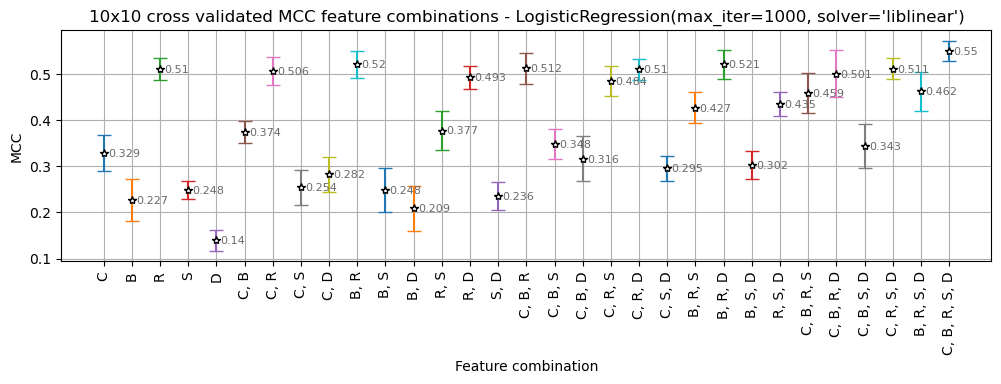

C, B, R, S, D 	 0.55  	 0.02
B, R, D 	 0.521  	 0.03
C, B, R, D 	 0.501  	 0.05
B, R 	 0.52  	 0.03
C, R, S 	 0.484  	 0.03
C, R, D 	 0.51  	 0.02
C, B, R 	 0.512  	 0.03
R 	 0.51  	 0.02
C, B, R, S 	 0.459  	 0.04
C, R, S, D 	 0.511  	 0.02
C, R 	 0.506  	 0.03
B, R, S, D 	 0.462  	 0.04
R, D 	 0.493  	 0.02
B, R, S 	 0.427  	 0.03
R, S, D 	 0.435  	 0.03
R, S 	 0.377  	 0.04
C, B, S, D 	 0.343  	 0.05
B, S, D 	 0.302  	 0.03
C, B 	 0.374  	 0.02
C, B, S 	 0.348  	 0.03
C 	 0.329  	 0.04
C, S, D 	 0.295  	 0.03
C, D 	 0.282  	 0.04
C, B, D 	 0.316  	 0.05
B, S 	 0.248  	 0.05
B, D 	 0.209  	 0.05
S, D 	 0.236  	 0.03
C, S 	 0.254  	 0.04
S 	 0.248  	 0.02
B 	 0.227  	 0.04
D 	 0.14  	 0.02


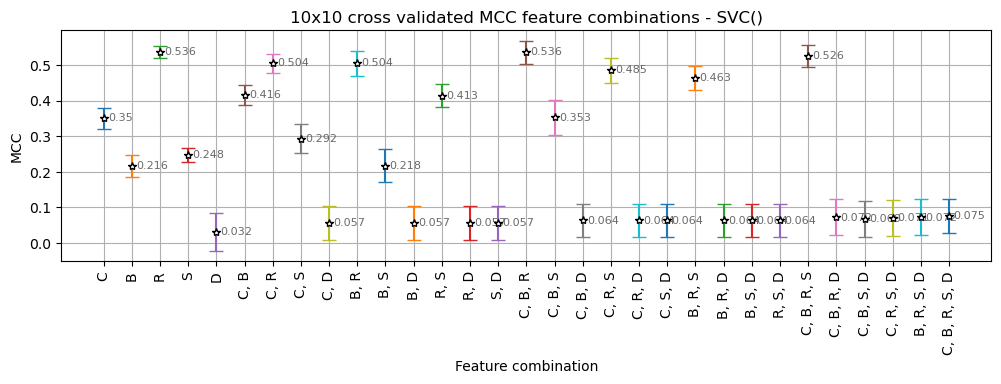

C, B, R 	 0.536  	 0.03
R 	 0.536  	 0.02
C, R 	 0.504  	 0.03
C, B, R, S 	 0.526  	 0.03
B, R 	 0.504  	 0.03
C, R, S 	 0.485  	 0.03
B, R, S 	 0.463  	 0.03
R, S 	 0.413  	 0.03
C, B 	 0.416  	 0.03
C, B, S 	 0.353  	 0.05
C 	 0.35  	 0.03
C, S 	 0.292  	 0.04
S 	 0.248  	 0.02
B, S 	 0.218  	 0.05
B 	 0.216  	 0.03
C, B, S, D 	 0.069  	 0.05
C, B, R, D 	 0.072  	 0.05
B, R, S, D 	 0.072  	 0.05
C, R, S, D 	 0.071  	 0.05
C, B, R, S, D 	 0.075  	 0.05
C, B, D 	 0.064  	 0.05
C, R, D 	 0.064  	 0.05
C, S, D 	 0.064  	 0.05
B, R, D 	 0.064  	 0.05
B, S, D 	 0.064  	 0.05
R, S, D 	 0.064  	 0.05
C, D 	 0.057  	 0.05
B, D 	 0.057  	 0.05
R, D 	 0.057  	 0.05
S, D 	 0.057  	 0.05
D 	 0.032  	 0.05


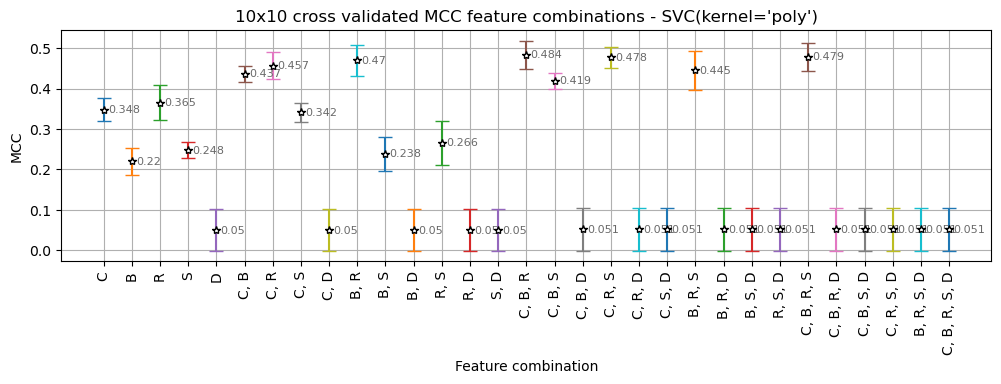

C, B, R, S 	 0.479  	 0.03
B, R 	 0.47  	 0.04
C, R 	 0.457  	 0.03
C, B, R 	 0.484  	 0.04
B, R, S 	 0.445  	 0.05
C, R, S 	 0.478  	 0.03
C, B 	 0.437  	 0.02
C, B, S 	 0.419  	 0.02
C, S 	 0.342  	 0.02
C 	 0.348  	 0.03
R 	 0.365  	 0.04
R, S 	 0.266  	 0.05
B, S 	 0.238  	 0.04
S 	 0.248  	 0.02
B 	 0.22  	 0.03
C, B, D 	 0.051  	 0.05
C, R, D 	 0.051  	 0.05
C, S, D 	 0.051  	 0.05
B, R, D 	 0.051  	 0.05
B, S, D 	 0.051  	 0.05
R, S, D 	 0.051  	 0.05
C, B, R, D 	 0.051  	 0.05
C, B, S, D 	 0.051  	 0.05
C, R, S, D 	 0.051  	 0.05
B, R, S, D 	 0.051  	 0.05
C, B, R, S, D 	 0.051  	 0.05
D 	 0.05  	 0.05
C, D 	 0.05  	 0.05
B, D 	 0.05  	 0.05
R, D 	 0.05  	 0.05
S, D 	 0.05  	 0.05


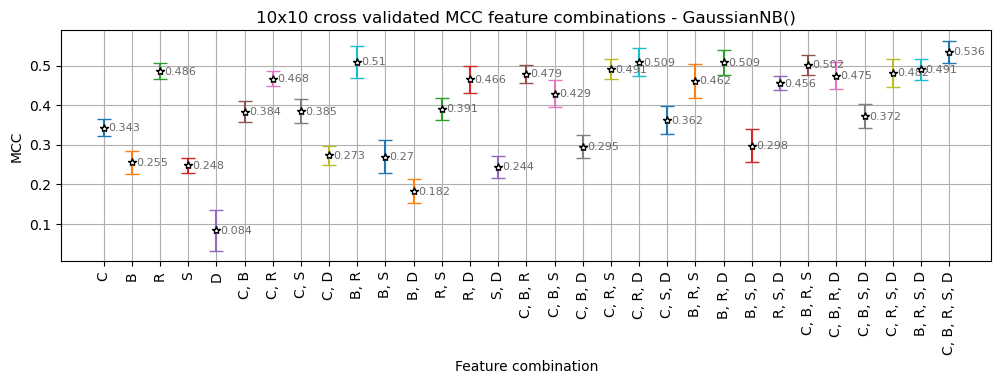

C, R, D 	 0.509  	 0.04
C, R, S 	 0.491  	 0.03
C, B, R, S, D 	 0.536  	 0.03
B, R, S, D 	 0.491  	 0.03
B, R, S 	 0.462  	 0.04
B, R, D 	 0.509  	 0.03
B, R 	 0.51  	 0.04
R 	 0.486  	 0.02
C, B, R, S 	 0.502  	 0.02
C, B, R, D 	 0.475  	 0.03
C, R, S, D 	 0.482  	 0.04
C, R 	 0.468  	 0.02
R, D 	 0.466  	 0.03
C, B, R 	 0.479  	 0.02
R, S, D 	 0.456  	 0.02
C, B, S 	 0.429  	 0.03
C, S, D 	 0.362  	 0.04
R, S 	 0.391  	 0.03
C, B, S, D 	 0.372  	 0.03
C, B 	 0.384  	 0.03
C, S 	 0.385  	 0.03
B, S, D 	 0.298  	 0.04
C 	 0.343  	 0.02
C, B, D 	 0.295  	 0.03
B, S 	 0.27  	 0.04
C, D 	 0.273  	 0.02
S 	 0.248  	 0.02
S, D 	 0.244  	 0.03
B 	 0.255  	 0.03
B, D 	 0.182  	 0.03
D 	 0.084  	 0.05


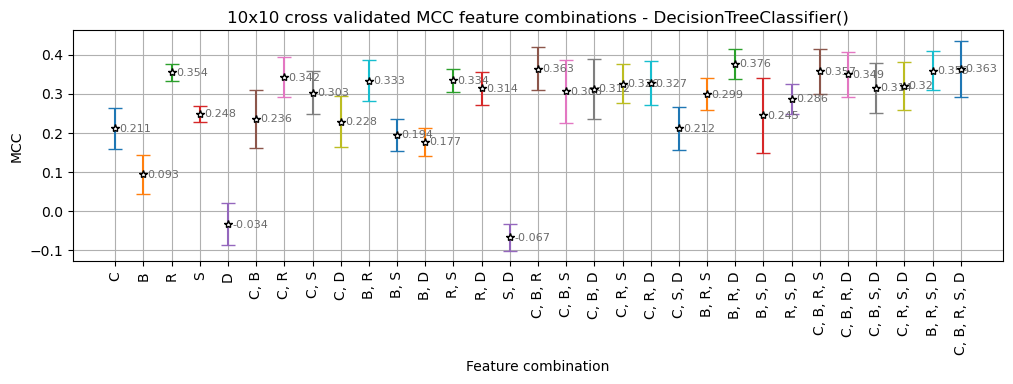

C, B, R, S, D 	 0.363  	 0.07
C, B, S 	 0.306  	 0.08
C, B, R, D 	 0.349  	 0.06
C, B, R 	 0.363  	 0.06
B, R, D 	 0.376  	 0.04
C, B, R, S 	 0.357  	 0.06
B, R, S, D 	 0.359  	 0.05
B, R 	 0.333  	 0.05
R, S 	 0.334  	 0.03
C, B, S, D 	 0.314  	 0.06
C, R 	 0.342  	 0.05
C, R, D 	 0.327  	 0.06
C, S 	 0.303  	 0.06
C, R, S 	 0.326  	 0.05
R 	 0.354  	 0.02
B, S, D 	 0.245  	 0.1
B, R, S 	 0.299  	 0.04
R, S, D 	 0.286  	 0.04
C, R, S, D 	 0.32  	 0.06
C, B, D 	 0.312  	 0.08
R, D 	 0.314  	 0.04
C, S, D 	 0.212  	 0.06
C, D 	 0.228  	 0.06
B, S 	 0.194  	 0.04
C 	 0.211  	 0.05
S 	 0.248  	 0.02
C, B 	 0.236  	 0.07
B, D 	 0.177  	 0.04
B 	 0.093  	 0.05
S, D 	 -0.067  	 0.03
D 	 -0.034  	 0.05


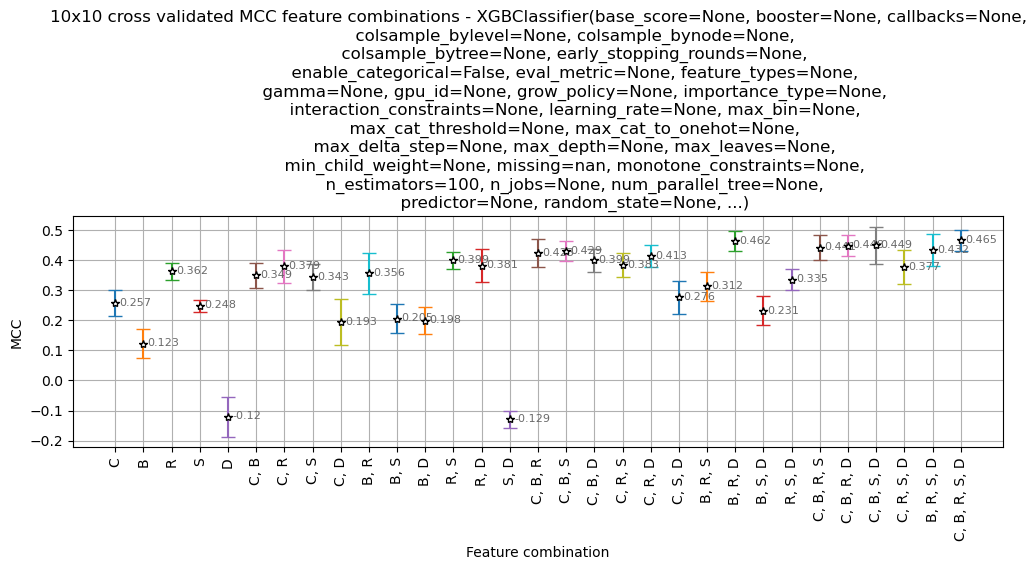

C, B, S, D 	 0.449  	 0.06
B, R, D 	 0.462  	 0.03
C, B, R, S 	 0.441  	 0.04
C, B, R, D 	 0.448  	 0.04
B, R, S, D 	 0.432  	 0.05
C, R, S, D 	 0.377  	 0.06
C, B, D 	 0.399  	 0.04
C, B, R, S, D 	 0.465  	 0.03
C, R, D 	 0.413  	 0.04
R, S 	 0.399  	 0.03
C, B, S 	 0.429  	 0.03
C, B, R 	 0.423  	 0.05
R, D 	 0.381  	 0.05
C, R 	 0.379  	 0.05
C, B 	 0.349  	 0.04
C, R, S 	 0.383  	 0.04
C, S 	 0.343  	 0.04
B, R 	 0.356  	 0.07
R, S, D 	 0.335  	 0.03
R 	 0.362  	 0.03
B, R, S 	 0.312  	 0.05
C, S, D 	 0.276  	 0.05
C 	 0.257  	 0.04
S 	 0.248  	 0.02
B, D 	 0.198  	 0.04
B, S, D 	 0.231  	 0.05
B, S 	 0.205  	 0.05
B 	 0.123  	 0.05
C, D 	 0.193  	 0.08
S, D 	 -0.129  	 0.03
D 	 -0.12  	 0.07


In [27]:
feature_cols = ['Cons', 'BAff', 'RelASA', 'SecStructure','CFragDocking']

all_mdls = GetAllmodels()

for mdl in all_mdls:
    DictModels_10FoldCrossVal = {}
    train_model_loop = range(0,10)
    feature_num = 0
    featureLabelList = [] 

    for L in range(0, len(feature_cols)+1):
        for subset in itertools.combinations(feature_cols, L):
            if len(subset) > 0:
                features = list(subset)
                feature_clean = str(features).replace("Cons", "C").replace("BAff","B").replace("RelASA","R").replace("CFragDocking","D").replace("SecStructure","S").replace("MaxOK2","MO")
                DictModels_10FoldCrossVal[str(feature_clean)] = []

    for L in range(0, len(feature_cols)+1):
        for subset in itertools.combinations(feature_cols, L):
            if len(subset) > 0:
                features = list(subset)
                feature_clean = str(features).replace("Cons", "C").replace("BAff","B").replace("RelASA","R").replace("CFragDocking","D").replace("SecStructure","S").replace("MaxOK2","MO")
                featureLabelList.append(feature_clean)
                for i in train_model_loop:
                    seed(i)
                    ML_X_train = df_splits[features].to_numpy()
                    ML_X_test = df_splits[features].to_numpy()
                    ML_y_train = df_splits.Active.to_numpy()
                    ML_y_train = ML_y_train.astype('int') 
                    ML_y_test = df_splits.Active.to_numpy()
                    ML_y_test = ML_y_test.astype('int') 
                    cv = KFold(n_splits=10, shuffle=True, random_state=i)
                    mcc_list = []
                    for train_ix, test_ix in cv.split(ML_X_train):

                        train_X, test_X = ML_X_train[train_ix], ML_X_train[test_ix]
                        train_y, test_y = ML_y_train[train_ix], ML_y_train[test_ix]

                        model_fit = mdl.fit(train_X,train_y)
                        y_pred=model_fit.predict(test_X)

                        mcc = matthews_corrcoef(test_y, y_pred)
                        mcc_list.append(mcc)
                    mean_score = np.mean(mcc_list)
                    DictModels_10FoldCrossVal[feature_clean].append(mean_score)
    #ShowGraph:
    idx = 0
    ModelNames = []
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 3)
    ax.set_title("10x10 cross validated MCC feature combinations - " + str(mdl))

    for key, value in DictModels_10FoldCrossVal.items():
        mean = np.mean(value)
        ax.plot(idx, mean, color='w', marker='*', markeredgecolor='k',zorder=3)
        std = np.std(value)
        ax.errorbar(idx, mean, yerr=std, fmt='', capsize=5)
        plt.text(idx+0.15, mean-0.008, str(round(mean,3)), color="dimgrey", fontsize =8)

        ModelNames.append(key.replace("'","").replace("[","").replace("]",""))
        idx +=1

    ax.set_xticks(np.arange(len(DictModels_10FoldCrossVal)))
    ax.set_xticklabels(ModelNames)
    plt.xlabel("Feature combination")
    plt.ylabel("MCC")
    plt.grid()
    plt.xticks(rotation=90)
    plt.show()
    best_keys = sorted(DictModels_10FoldCrossVal, key=DictModels_10FoldCrossVal.get, reverse=True)[:]
    for key in best_keys:
        print(key.replace("'","").replace("[","").replace("]",""),"\t", np.round(np.mean(DictModels_10FoldCrossVal[key])*1000)/1000, " \t", np.round(np.std(DictModels_10FoldCrossVal[key])*100)/100)

## Model training

CV Accuracy: 0.784 (0.118)
CV Precision: 0.780 (0.159)
CV Recall: 0.776 (0.121)
Logit Coefficients: [[-1.72554112  1.2471668   2.13274471 -0.65159228  0.00367445]] [-0.54106848]
MCC 0.57
Accuracy: 0.79
Precision: 0.79
Recall: 0.77


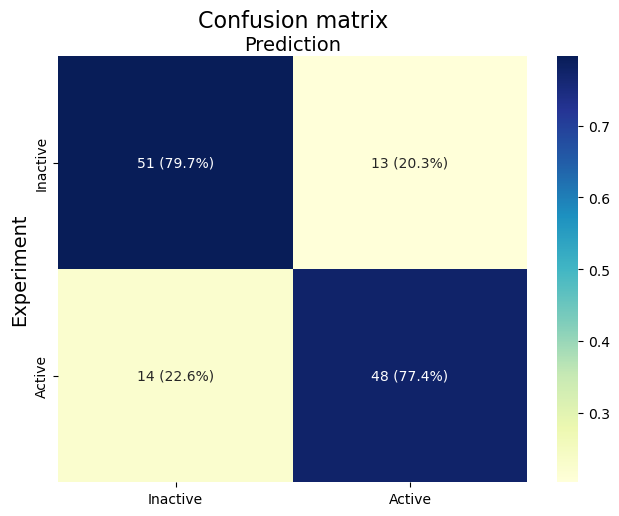

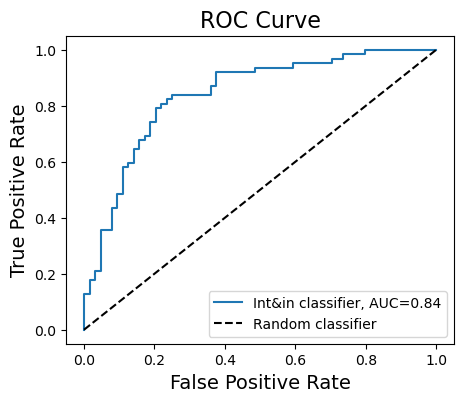


******** For i = 0 ******
Testing accuracy is 0.49206349206349204
TP Rate 0.49206349206349204
TN Rate nan


C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\1333775322.py:87: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tn = TN/(TN+FN)


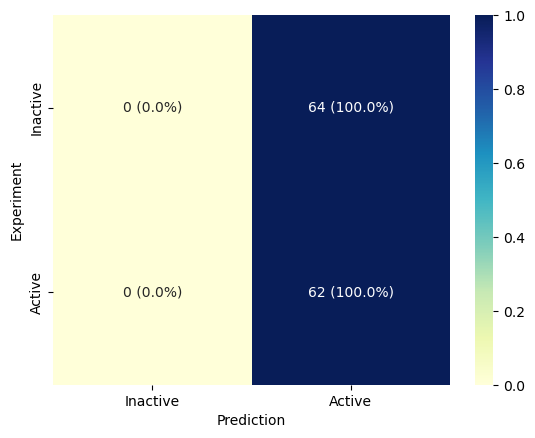


******** For i = 0.05 ******
Testing accuracy is 0.49206349206349204
TP Rate 0.49206349206349204
TN Rate nan


C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\1333775322.py:87: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tn = TN/(TN+FN)


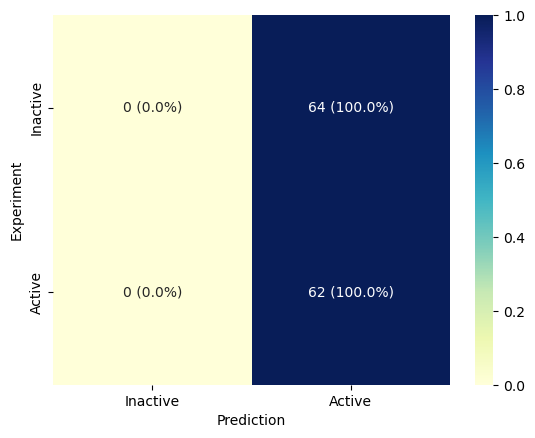

C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\1333775322.py:87: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tn = TN/(TN+FN)



******** For i = 0.1 ******
Testing accuracy is 0.49206349206349204
TP Rate 0.49206349206349204
TN Rate nan


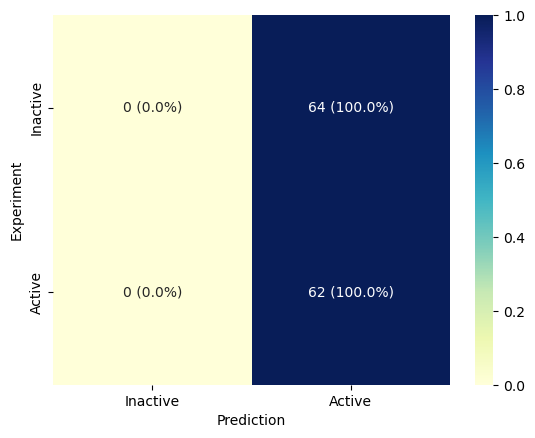

C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\1333775322.py:87: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tn = TN/(TN+FN)



******** For i = 0.15 ******
Testing accuracy is 0.49206349206349204
TP Rate 0.49206349206349204
TN Rate nan


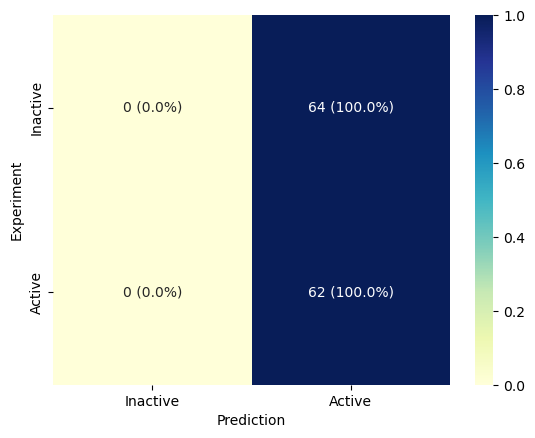


******** For i = 0.2 ******
Testing accuracy is 0.5317460317460317
TP Rate 0.512396694214876
TN Rate 1.0


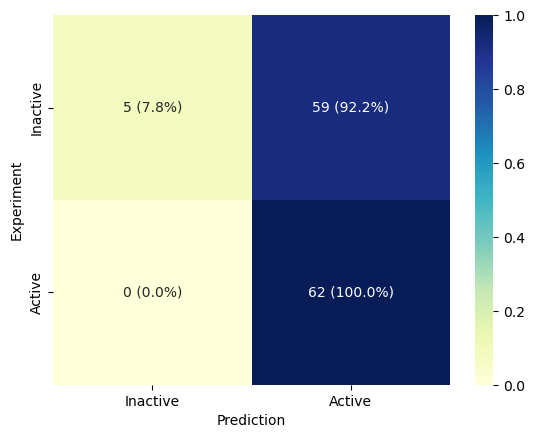


******** For i = 0.25 ******
Testing accuracy is 0.6111111111111112
TP Rate 0.5607476635514018
TN Rate 0.8947368421052632


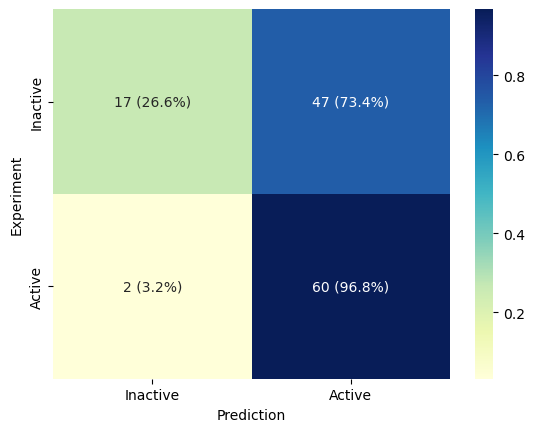


******** For i = 0.3 ******
Testing accuracy is 0.6666666666666666
TP Rate 0.6041666666666666
TN Rate 0.8666666666666667


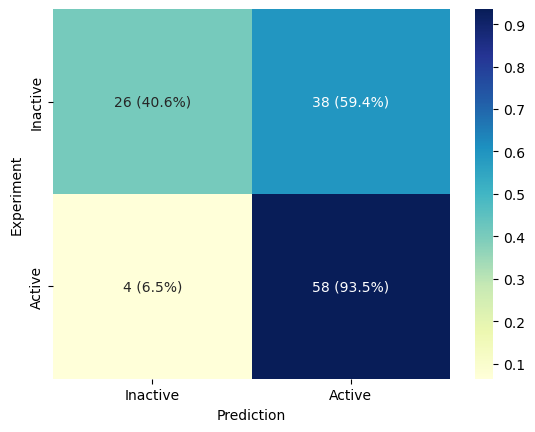


******** For i = 0.35 ******
Testing accuracy is 0.7142857142857143
TP Rate 0.6444444444444445
TN Rate 0.8888888888888888


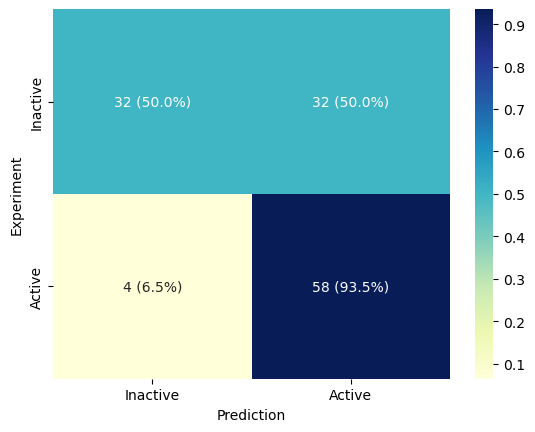


******** For i = 0.4 ******
Testing accuracy is 0.753968253968254
TP Rate 0.7012987012987013
TN Rate 0.8367346938775511


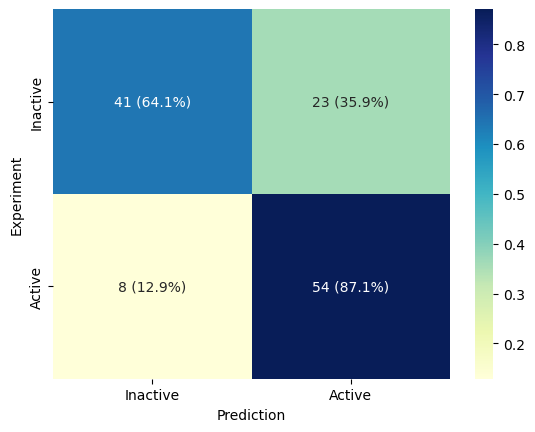


******** For i = 0.45 ******
Testing accuracy is 0.7857142857142857
TP Rate 0.7692307692307693
TN Rate 0.8032786885245902


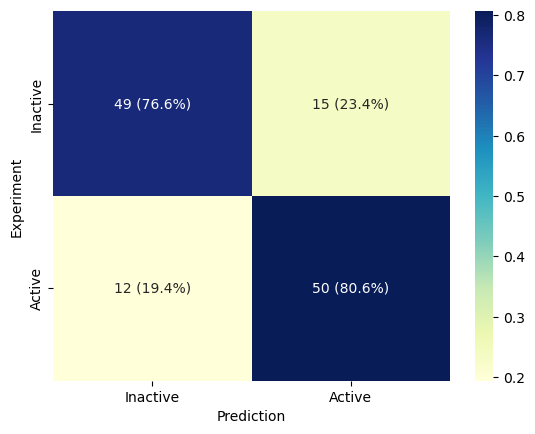


******** For i = 0.5 ******
Testing accuracy is 0.7857142857142857
TP Rate 0.7868852459016393
TN Rate 0.7846153846153846


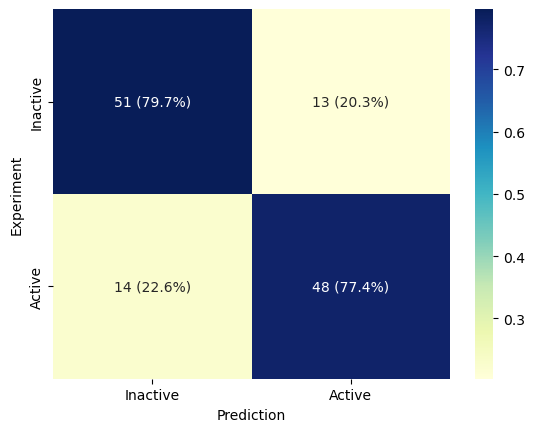


******** For i = 0.55 ******
Testing accuracy is 0.753968253968254
TP Rate 0.7818181818181819
TN Rate 0.7323943661971831


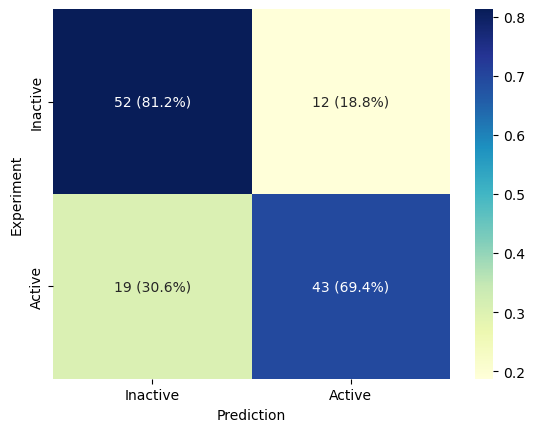


******** For i = 0.6 ******
Testing accuracy is 0.7301587301587301
TP Rate 0.8333333333333334
TN Rate 0.6785714285714286


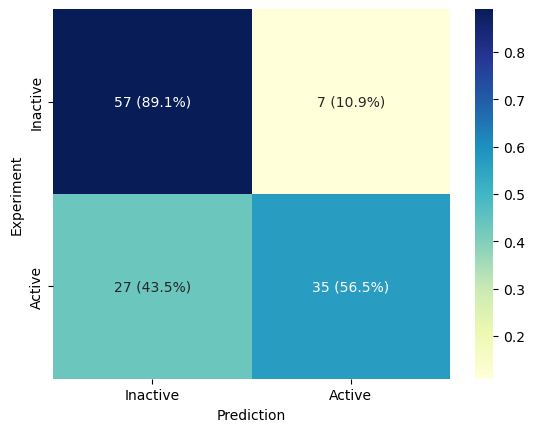


******** For i = 0.65 ******
Testing accuracy is 0.6746031746031746
TP Rate 0.8181818181818182
TN Rate 0.6236559139784946


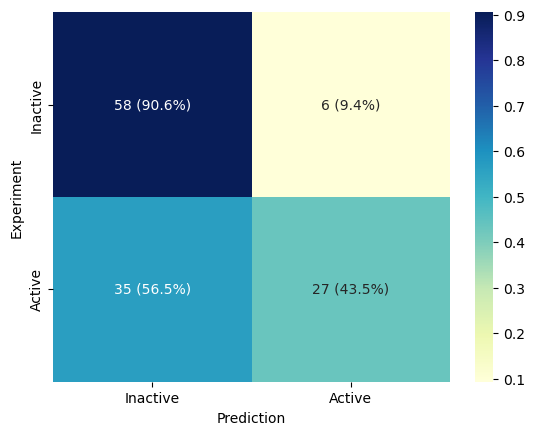


******** For i = 0.7 ******
Testing accuracy is 0.6507936507936508
TP Rate 0.8214285714285714
TN Rate 0.6020408163265306


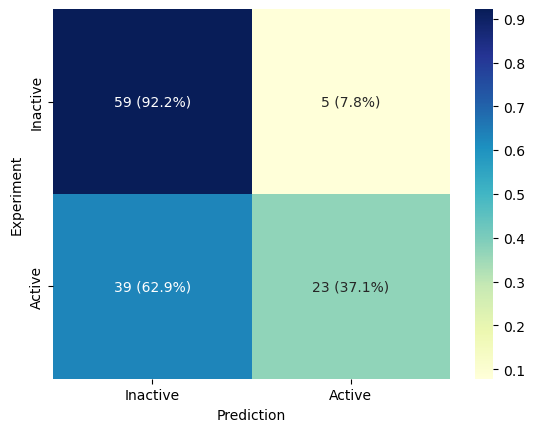


******** For i = 0.75 ******
Testing accuracy is 0.5952380952380952
TP Rate 0.8235294117647058
TN Rate 0.5596330275229358


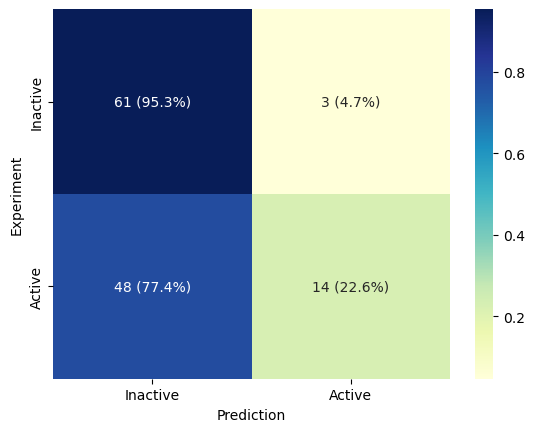


******** For i = 0.8 ******
Testing accuracy is 0.5714285714285714
TP Rate 1.0
TN Rate 0.5423728813559322


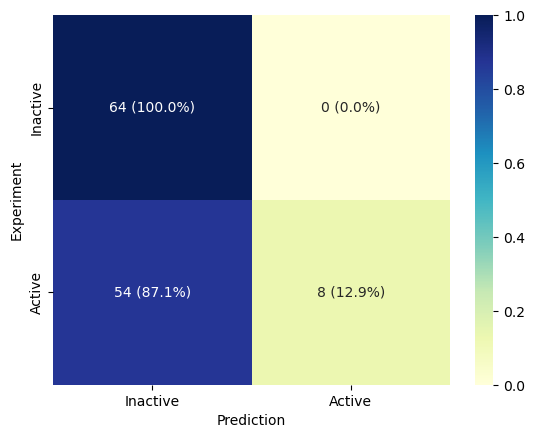


******** For i = 0.85 ******
Testing accuracy is 0.5555555555555556
TP Rate 1.0
TN Rate 0.5333333333333333


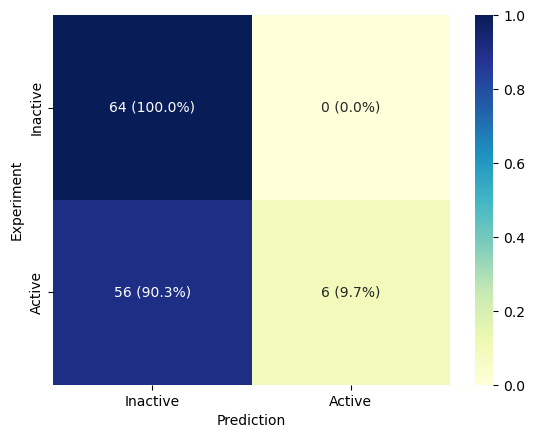


******** For i = 0.9 ******
Testing accuracy is 0.5317460317460317
TP Rate 1.0
TN Rate 0.5203252032520326


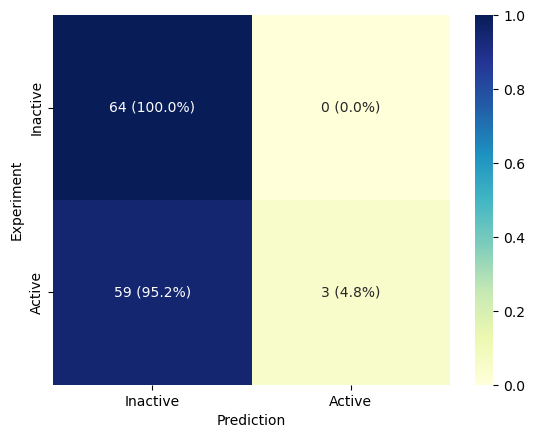


******** For i = 0.95 ******
Testing accuracy is 0.5079365079365079
TP Rate nan
TN Rate 0.5079365079365079


C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\1333775322.py:86: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tp = TP/(TP+FP)


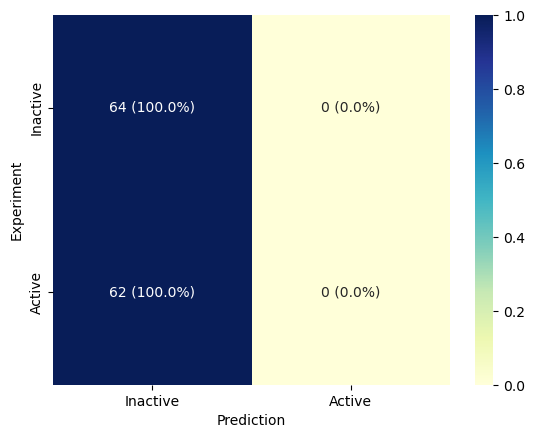


******** For i = 1 ******
Testing accuracy is 0.5079365079365079
TP Rate nan
TN Rate 0.5079365079365079


C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\1333775322.py:86: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tp = TP/(TP+FP)


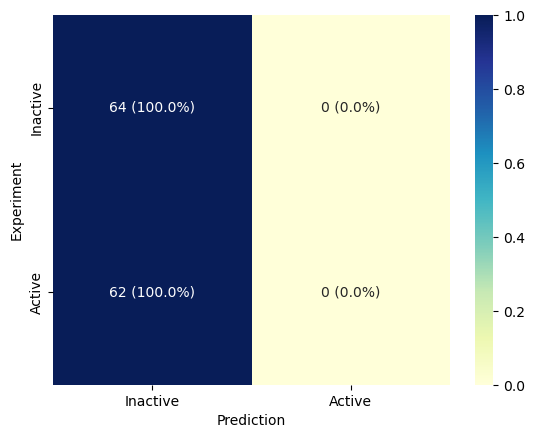

C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\1333775322.py:120: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tn.append(TN/(TN+FN))
C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\1333775322.py:120: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tn.append(TN/(TN+FN))
C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\1333775322.py:120: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tn.append(TN/(TN+FN))
C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\1333775322.py:120: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tn.append(TN/(TN+FN))
C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\1333775322.py:119: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tp.append(TP/(TP+FP))
C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\1333775322.py:119: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tp.append(TP/(TP+FP))


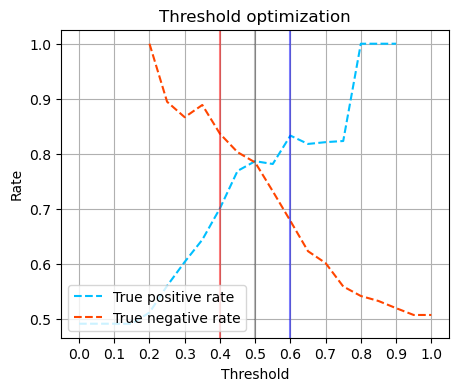

Inactive 64
Moderate activity 20
High active 42
Data 1: False Data 2: True -> Mann Whiteney U
Data 1: True Data 2: True -> T-test
Data 1: False Data 2: True -> Mann Whiteney U
3
0.3776506500491801
0.48843350086147364
0.6813992803486042


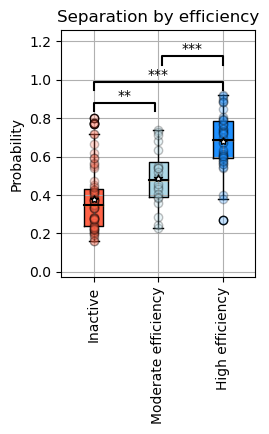

In [28]:
feature_cols = ['Cons', 'BAff', 'RelASA', 'SecStructure','CFragDocking']

ML_X_train = df_splits[feature_cols].to_numpy()
ML_y_train = df_splits.Active.to_numpy()
ML_y_train = ML_y_train.astype('int') 
ML_Eff = df_splits.Efficiency.to_numpy()

cv = KFold(n_splits=10, random_state=0, shuffle=True)
logit = LogisticRegression(solver='liblinear', max_iter=1000)
scores = cross_val_score(logit, ML_X_train, ML_y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('CV Accuracy: %.3f (%.3f)' % ((np.mean(scores)), np.std(scores)))
scores = cross_val_score(logit, ML_X_train, ML_y_train, scoring='precision', cv=cv, n_jobs=-1)
print('CV Precision: %.3f (%.3f)' % ((np.mean(scores)), np.std(scores)))
scores = cross_val_score(logit, ML_X_train, ML_y_train, scoring='recall', cv=cv, n_jobs=-1)
print('CV Recall: %.3f (%.3f)' % ((np.mean(scores)), np.std(scores)))

# fit the model with data
model_coeff = logit.fit(ML_X_train,ML_y_train)
y_pred_logit=logit.predict(ML_X_train)
y_proba = logit.predict_proba(ML_X_train)[:,1][:,np.newaxis]
print("Logit Coefficients:", model_coeff.coef_, model_coeff.intercept_)
mcc = matthews_corrcoef(ML_y_train, y_pred_logit)
      
print("MCC", round(mcc*100)/100)
print("Accuracy:",round(metrics.accuracy_score(ML_y_train, y_pred_logit)*100)/100)
print("Precision:",round(metrics.precision_score(ML_y_train, y_pred_logit)*100)/100)
print("Recall:",round(metrics.recall_score(ML_y_train, y_pred_logit)*100)/100)


cnf_matrix = metrics.confusion_matrix(ML_y_train, y_pred_logit)

cnf_matrix_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
group_percentages = ["{0:.1%}".format(value) for value in cnf_matrix_normalized.flatten()]
labels = [str(v1 + " ("+v2+")") for v1, v2 in zip(group_counts,group_percentages)] 
labels = np.asarray(labels).reshape(2,2)

%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_normalized), annot=labels, cmap="YlGnBu" ,fmt='')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', fontsize=16)

class_names=["Inactive","Active"] # name  of classes
tick_marks=[0.5,1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Experiment', fontsize=14)
plt.xlabel('Prediction', fontsize=14)
plt.show()

y_pred_logit = logit.predict_proba(ML_X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(ML_y_train,  y_pred_logit)
auc = metrics.roc_auc_score(ML_y_train, y_pred_logit)

fig, ax = plt.subplots()
fig.set_size_inches(5, 4)
ax.set_title("ROC Curve", fontsize=16)

ax.plot(fpr,tpr,label="Int&in classifier, AUC="+str(round(auc*100)/100))
ax.plot([0, 1], [0, 1], 'k--', label = 'Random classifier')
ax.legend(loc=4)
ax.set_ylabel('True Positive Rate', fontsize=14)
ax.set_xlabel('False Positive Rate', fontsize=14)
plt.show()

pred_proba_df = logit.predict_proba(ML_X_train)[::,1]
threshold_list = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,1]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_train_pred = [1 if x>=i else 0 for x in pred_proba_df]
    test_accuracy = metrics.accuracy_score(ML_y_train, Y_train_pred)
    CM = metrics.confusion_matrix(ML_y_train, Y_train_pred)

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    
    rate_tp = TP/(TP+FP)
    rate_tn = TN/(TN+FN)
                
    print('Testing accuracy is {}'.format(test_accuracy))
    print('TP Rate {}'.format(rate_tp))
    print('TN Rate {}'.format(rate_tn))
    cnf_matrix = metrics.confusion_matrix(ML_y_train, Y_train_pred)
    cnf_matrix_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
    group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
    group_percentages = ["{0:.1%}".format(value) for value in cnf_matrix_normalized.flatten()]
    labels = [str(v1 + " ("+v2+")") for v1, v2 in zip(group_counts,group_percentages)] 
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(pd.DataFrame(cnf_matrix_normalized), annot=labels, cmap="YlGnBu",fmt='')
    class_names=["Inactive","Active"] # name  of classes
    tick_marks=[0.5,1.5]
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    plt.ylabel('Experiment')
    plt.xlabel('Prediction')
    plt.show()

rate_tp = []
rate_tn = []
thresholds =[]
for i in threshold_list:
    threshold = i
    Y_train_pred = [1 if x>=threshold else 0 for x in pred_proba_df]
    CM = metrics.confusion_matrix(ML_y_train, Y_train_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    rate_tp.append(TP/(TP+FP))
    rate_tn.append(TN/(TN+FN))
    thresholds.append(threshold)


fig, ax = plt.subplots()
fig.set_size_inches(5, 4)
ax.plot(thresholds, rate_tp, "deepskyblue",linestyle="--", label="True positive rate")
ax.plot(thresholds, rate_tn, "orangered",linestyle="--", label="True negative rate")
ax.set_ylabel('Rate')
plt.axvline(x=0.4, color='r', alpha=0.5)
plt.axvline(x=0.6, color='b', alpha=0.5)
plt.axvline(x=0.5, color='black', alpha=0.25)
plt.title('Threshold optimization')
ax.set_xlabel('Threshold')
plt.xticks(np.arange(0,1.1, 0.1))
ax.legend(loc="lower left")
plt.grid()
plt.show()


#This is for the Efficiency Investigation
BinsEfficiency = {}
labels = []
for i in range(0,3):
    BinsEfficiency[i] = []
test = 0
idx = 0
for proba_single in y_proba:
    if ML_Eff[idx] != -1:
        if ML_Eff[idx] <= 0.0:
            BinsEfficiency[0].append(proba_single[0])
        elif ML_Eff[idx] < 0.5:
            BinsEfficiency[1].append(proba_single[0])
        else:
            BinsEfficiency[2].append(proba_single[0])
    idx += 1
fig, ax = plt.subplots()
fig.set_size_inches(2.5, 3.2)
ax.set_title("Separation by efficiency")
print("Inactive", len(BinsEfficiency[0]))
print("Moderate activity", len(BinsEfficiency[1]))
print("High active", len(BinsEfficiency[2]))
namess = ["Inactive", "Moderate efficiency", "High efficiency"]

getMax = max([max(BinsEfficiency[0]),max(BinsEfficiency[1])])
getMax2 = max([max(BinsEfficiency[1]),max(BinsEfficiency[2])])

pval_test_zero = CheckSignificance(BinsEfficiency[0], BinsEfficiency[1])   
pval_test = CheckSignificance(BinsEfficiency[1], BinsEfficiency[2])    
pval_all = CheckSignificance(BinsEfficiency[0], BinsEfficiency[2])    

annot_stat(pval_test_zero, 1, 1.95, getMax, ax)
annot_stat(pval_test, 2.05, 3, getMax2+0.1, ax)
annot_stat(pval_all, 1, 3, getMax+0.1, ax)

bp = ax.boxplot([BinsEfficiency[0], BinsEfficiency[1], BinsEfficiency[2]])

getMin = min([min(BinsEfficiency[0]),min(BinsEfficiency[1]),min(BinsEfficiency[2])])
getMax = max([max(BinsEfficiency[0]),max(BinsEfficiency[1]),max(BinsEfficiency[2])])
ChangeBy = getMax*0.2
ax.set_ylim([getMin-ChangeBy, getMax+ChangeBy+0.15])#Add 20% to the top for the significance
box_colors = ['tomato', 'lightblue','dodgerblue']
num_boxes = len(BinsEfficiency)
print(num_boxes)
medians = np.empty(num_boxes)

for i in range(num_boxes):
    box = bp['boxes'][i]
    box_x = []
    box_y = []
    for j in range(5):
        box_x.append(box.get_xdata()[j])
        box_y.append(box.get_ydata()[j])
    box_coords = np.column_stack([box_x, box_y])
    ax.add_patch(Polygon(box_coords, facecolor=box_colors[i]))
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    median_x = []
    median_y = []
    for j in range(2):
        median_x.append(med.get_xdata()[j])
        median_y.append(med.get_ydata()[j])
        ax.plot(median_x, median_y, 'k',zorder=3)
    medians[i] = median_y[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    print(np.average(BinsEfficiency[i]))
    ax.plot(np.average(med.get_xdata()), np.average(BinsEfficiency[i]),
            color='w', marker='*', markeredgecolor='k',zorder=3)
        
ax.scatter([1]*len(BinsEfficiency[0]), BinsEfficiency[0], color = 'tomato', alpha=0.25, edgecolors='black',zorder=2)
ax.scatter([2]*len(BinsEfficiency[1]), BinsEfficiency[1], color = 'lightblue', alpha=0.25, edgecolors='black',zorder=2)
ax.scatter([3]*len(BinsEfficiency[2]), BinsEfficiency[2], color = 'dodgerblue', alpha=0.25, edgecolors='black',zorder=2)

mean_inactive = np.mean(BinsEfficiency[0])
mean_loweff = np.mean(BinsEfficiency[1])
mean_eff = np.mean(BinsEfficiency[2])
    
ax.set_xticks(np.arange(1,len(namess)+1))
ax.set_xticklabels(namess)
plt.ylabel("Probability")
plt.grid()
plt.xticks(rotation=90)
plt.show()

## Model testing

In [19]:
#Load in testig data set:
file_dataset ="LiteratureDataset_final.csv"
df_inteins_test = pd.read_csv(file_dataset, sep='\t', lineterminator='\n', index_col=False)
df_inteins_test.dropna(axis=0, how='any', inplace=False)
df_inteins_allsites = pd.DataFrame({'Intein':[],'Sequence':[],'SplitSite':[],'Active':[],'Cons':[],'BAff':[],'RelASA':[],'CFragDocking':[],'SecStructure':[]})

CFragDocking_rangeBeforeAfter = 8#How many residues are considered for 

#Add new columns to dataframe
df_inteins_allsites["Intein"] = ""
df_inteins_allsites["SplitSite"] = ""
df_inteins_allsites["Active"] = ""
df_inteins_allsites["Active_Type"] = ""
df_inteins_allsites["Cons"] = ""
df_inteins_allsites["BAff"] = ""
df_inteins_allsites["RelASA"] = ""
df_inteins_allsites["CFragDocking"] = ""
df_inteins_allsites["SecStructure"] = ""

dfs_to_concat =[]
print("Total inteins:", len(df_inteins_test))
#Gp through the generated dataframe
for index_gen, row_gen in df_inteins_test.iterrows():
    #Get all data from the respective intein
    current_Intein  = str(row_gen["PDBName"])
    
    residueConservation = row_gen["Conservation [Residue]"].split(";")
    residueConservation = [float(i.replace(",",".")) for i in residueConservation]
    PositiveValues = [i for i in residueConservation if i > 0]
    NegativeValues = [i for i in residueConservation if i <= 0]
    max_PosValues = max(PositiveValues)
    min_PosValues = min(PositiveValues)
    max_NegValues = max(NegativeValues)
    min_NegValues = min(NegativeValues)
    residueConservation = [(1-(i-min_PosValues)/(max_PosValues-min_PosValues))*0.5 if i >= 0 
                           else (1-(i-min_NegValues)/(max_NegValues-min_NegValues))*0.5+0.5 
                           for i in residueConservation]#1 = conserved, 0 = non conserved
    #BindingAffinity
    splitBindingAffinity = row_gen["BindingAffinity [Split]"].split(";")
    splitBindingAffinity = [float(i.replace(",",".")) for i in splitBindingAffinity]
    splitBindingAffinity_original = [i for i in splitBindingAffinity]
    minBindAff = min(splitBindingAffinity)
    if minBindAff == 0:
        minBindAff=1
    splitBindingAffinity = [i/minBindAff for i in splitBindingAffinity]
    #resASA
    residuerelASA = row_gen["RelASA [Residue]"].split(";")
    residuerelASA = [float(i.replace(",",".")) for i in residuerelASA]
    #C-FragmentDocking
    HydrogenBonds = str(row_gen["HydrogenBonds"]).split(";")
    SecStr = str(row_gen["Sec Structure [Residue]"])
    SBridges = str(row_gen["SBridges"]).split(";")
    Arom = str(row_gen["Arom"]).split(";")
    vDW = str(row_gen["vDW"]).split(";")#HBonds_HighpH
    SeqLen = len(str(row_gen["Sequence"]))
    
    SumCFragDockingResult = CFragDocking(HydrogenBonds,SBridges,Arom,vDW,SeqLen, CFragDocking_rangeBeforeAfter)
    
    SplitSites = str(row_gen["EstSplit"]).split(";")
    sites = []
    sites_result = []
    for site in SplitSites:
        if site != "nan":
            df_site =  pd.DataFrame({'Intein':[],'Sequence':[],'SplitSite':[],'Active_Type':[],'Active':[],'Cons':[],'BAff':[],'RelASA':[],'CFragDocking':[],'SecStructure':[]})
            site_split = site.split("=")
            Site_x = int(site_split[0])#split sites are not indexed! they give the residue number!
            Result = int(site_split[1])
            df_site.loc[0, 'Intein'] = current_Intein
            df_site.loc[0, 'SplitSite'] = Site_x
            df_site.loc[0, 'Active_Type'] = Result
            if Result >= 1:
                Result = 1
            df_site.loc[0, 'Active'] = Result
            df_site.loc[0, 'Sequence'] = str(row_gen["Sequence"])
            if SeqLen >= Site_x+2:
                df_site.loc[0, 'Cons'] = (residueConservation[Site_x-1]+residueConservation[Site_x]+residueConservation[Site_x+2])/3
            else:
                df_site.loc[0, 'Cons'] = (residueConservation[Site_x-1]+residueConservation[Site_x]+residueConservation[Site_x+2])/3
            df_site.loc[0, 'BAff'] = splitBindingAffinity[Site_x-1]
            relsasa = residuerelASA[Site_x]
            if Site_x >= 2:
                relsasa = (residuerelASA[Site_x-2]+residuerelASA[Site_x])/2
            df_site.loc[0, 'RelASA'] = relsasa
            df_site.loc[0, 'CFragDocking'] = SumCFragDockingResult[Site_x-1]
            issecstr = 0
            if SecStr[Site_x-1] == "b" and SecStr[Site_x] == "b":
                issecstr = 1
            df_site.loc[0, 'SecStructure'] = issecstr
            dfs_to_concat.append(df_site)  
            
df_inteins_allsites = pd.concat(dfs_to_concat, ignore_index=True)
df_inteins_allsites.head()

Total inteins: 41


,Intein,Sequence,SplitSite,Active_Type,Active,Cons,BAff,RelASA,CFragDocking,SecStructure
0,acel-terl_unrelaxed_rank_1_model_5,CVYGDTMVETEDGKIKIEDLYKRLAMFRTNTNNIKILSPNGFSNFN...,25.0,1.0,1.0,0.309593,0.542745,0.442141,57.0,1.0
1,AovDnaE_unrelaxed_rank_1_model_5,CLSADTEILTVEYGFLPIGEIVGKAIECRVYSVDGNGNIYTQSIAQ...,101.0,1.0,1.0,0.349043,0.872393,0.310152,163.2,1.0
2,AspDnaE_unrelaxed_rank_1_model_5,CLSYDTEVLTVEYGFVPIGEIVEKGIECSVFSINNNGIVYTQPIAQ...,102.0,1.0,1.0,0.228679,0.924728,0.388844,189.0,0.0
3,AvaDnaE_unrelaxed_rank_1_model_1,CLSYDTEVLTVEYGFVPIGEIVDKGIECSVFSIDSNGIVYTQPIAQ...,102.0,1.0,1.0,0.199879,0.928184,0.406144,177.2,0.0
4,cneprp8_4a465_unrelaxed_rank_1_model_5,CLQNGTRLLRADGSEVLVEDVQEGDQLLGPDGTSRTASKIVRGEER...,164.0,0.0,0.0,0.813680,0.406494,0.107777,194.6,0.0


CV Accuracy: 0.732 (0.152)
MCC 0.55
Accuracy: 0.78
Precision: 0.76
Recall: 0.91


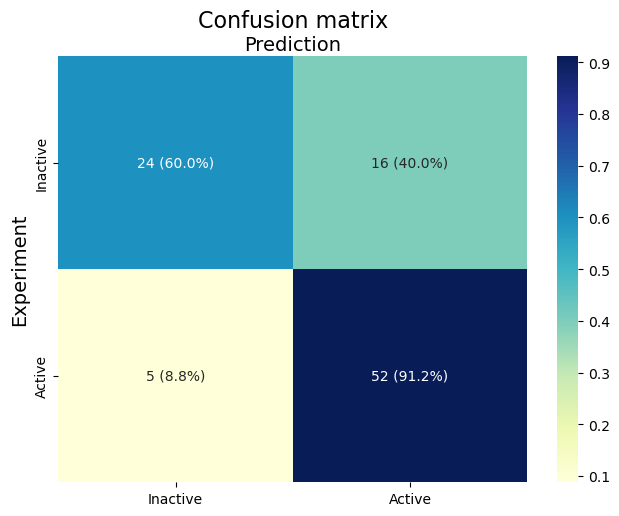

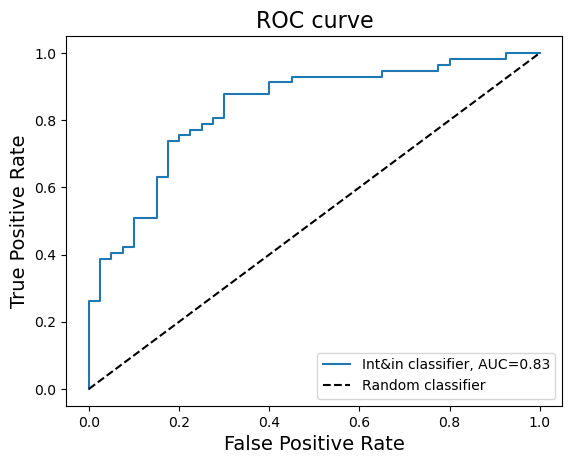


******** For i = 0 ******
Testing accuracy is 0.5876288659793815
TP Rate 0.5876288659793815
TN Rate nan


C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\2214570638.py:71: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tn = TN/(TN+FN)


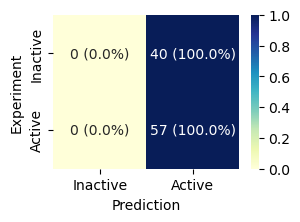


******** For i = 0.05 ******
Testing accuracy is 0.5876288659793815
TP Rate 0.5876288659793815
TN Rate nan


C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\2214570638.py:71: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tn = TN/(TN+FN)


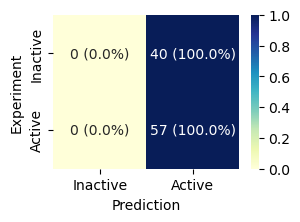

C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\2214570638.py:71: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tn = TN/(TN+FN)



******** For i = 0.1 ******
Testing accuracy is 0.5876288659793815
TP Rate 0.5876288659793815
TN Rate nan


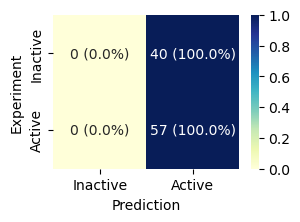

C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\2214570638.py:71: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tn = TN/(TN+FN)



******** For i = 0.15 ******
Testing accuracy is 0.5876288659793815
TP Rate 0.5876288659793815
TN Rate nan


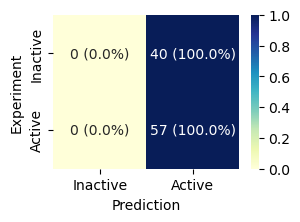


******** For i = 0.2 ******
Testing accuracy is 0.6082474226804123
TP Rate 0.6
TN Rate 1.0


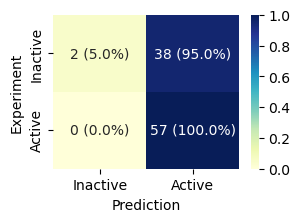


******** For i = 0.25 ******
Testing accuracy is 0.6185567010309279
TP Rate 0.6086956521739131
TN Rate 0.8


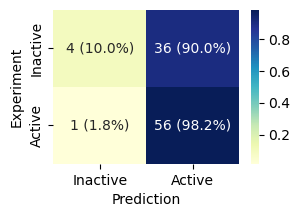


******** For i = 0.3 ******
Testing accuracy is 0.6288659793814433
TP Rate 0.6153846153846154
TN Rate 0.8333333333333334


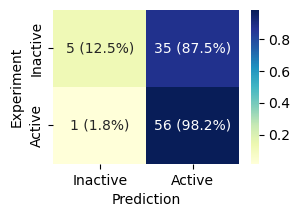


******** For i = 0.35 ******
Testing accuracy is 0.6597938144329897
TP Rate 0.6395348837209303
TN Rate 0.8181818181818182


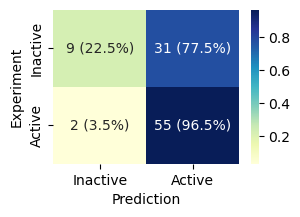


******** For i = 0.4 ******
Testing accuracy is 0.7010309278350515
TP Rate 0.675
TN Rate 0.8235294117647058


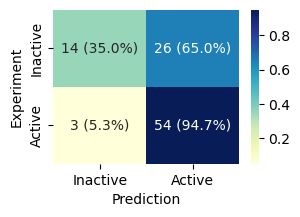


******** For i = 0.45 ******
Testing accuracy is 0.7525773195876289
TP Rate 0.726027397260274
TN Rate 0.8333333333333334


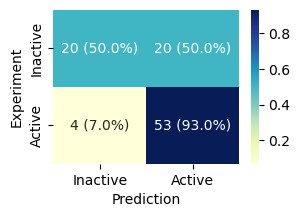


******** For i = 0.5 ******
Testing accuracy is 0.7835051546391752
TP Rate 0.7647058823529411
TN Rate 0.8275862068965517


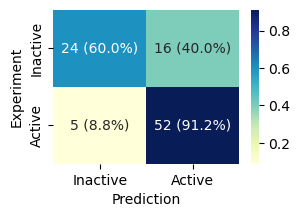


******** For i = 0.55 ******
Testing accuracy is 0.7628865979381443
TP Rate 0.8148148148148148
TN Rate 0.6976744186046512


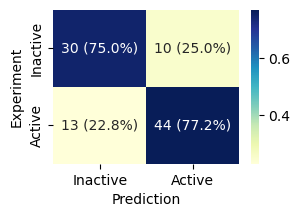


******** For i = 0.6 ******
Testing accuracy is 0.7422680412371134
TP Rate 0.8478260869565217
TN Rate 0.6470588235294118


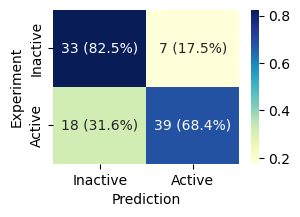


******** For i = 0.65 ******
Testing accuracy is 0.6701030927835051
TP Rate 0.8378378378378378
TN Rate 0.5666666666666667


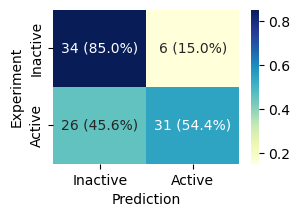


******** For i = 0.7 ******
Testing accuracy is 0.6288659793814433
TP Rate 0.8888888888888888
TN Rate 0.5285714285714286


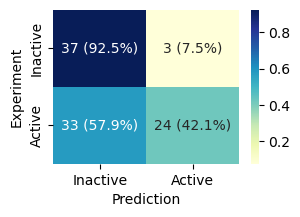


******** For i = 0.75 ******
Testing accuracy is 0.6185567010309279
TP Rate 0.9166666666666666
TN Rate 0.5205479452054794


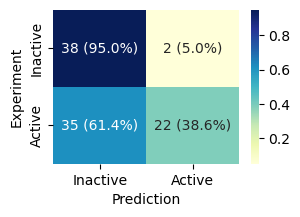


******** For i = 0.8 ******
Testing accuracy is 0.5567010309278351
TP Rate 0.9375
TN Rate 0.48148148148148145


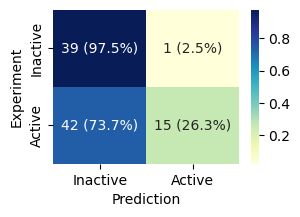


******** For i = 0.85 ******
Testing accuracy is 0.5154639175257731
TP Rate 1.0
TN Rate 0.45977011494252873


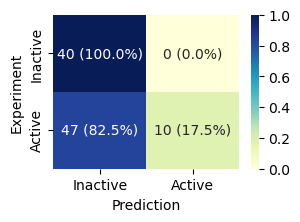


******** For i = 0.9 ******
Testing accuracy is 0.4329896907216495
TP Rate 1.0
TN Rate 0.42105263157894735


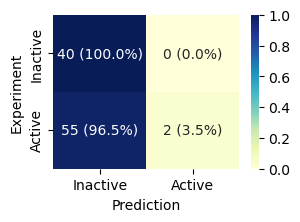


******** For i = 0.95 ******
Testing accuracy is 0.41237113402061853
TP Rate nan
TN Rate 0.41237113402061853


C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\2214570638.py:70: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tp = TP/(TP+FP)


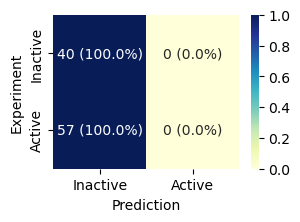


******** For i = 1 ******
Testing accuracy is 0.41237113402061853
TP Rate nan
TN Rate 0.41237113402061853


C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\2214570638.py:70: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tp = TP/(TP+FP)


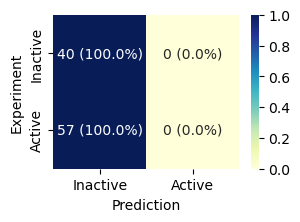

C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\2214570638.py:111: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tn.append(TN/(TN+FN))
C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\2214570638.py:111: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tn.append(TN/(TN+FN))
C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\2214570638.py:111: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tn.append(TN/(TN+FN))
C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\2214570638.py:111: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tn.append(TN/(TN+FN))
C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\2214570638.py:110: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tp.append(TP/(TP+FP))
C:\Users\mirko\AppData\Local\Temp\ipykernel_18760\2214570638.py:110: RuntimeWarning: invalid value encountered in longlong_scalars
  rate_tp.append(TP/(TP+FP))


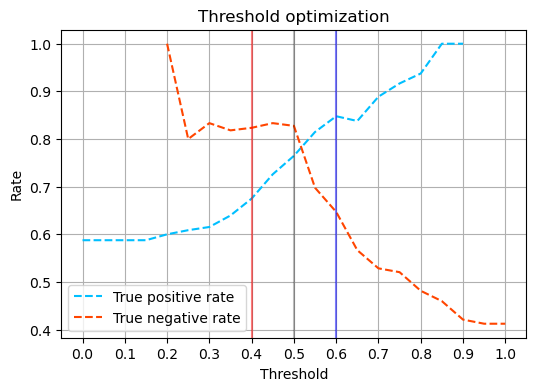

In [20]:
feature_cols = ['Cons', 'BAff', 'RelASA', 'SecStructure','CFragDocking']

X = df_inteins_allsites[feature_cols].to_numpy()
y = df_inteins_allsites.Active.to_numpy()
y = y.astype('int') 
activity_type = df_inteins_allsites.Active_Type.to_numpy()

y_pred_logit=logit.predict(X)

cv = KFold(n_splits=10, random_state=0, shuffle=True)
scores = cross_val_score(logit, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('CV Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
mcc = matthews_corrcoef(y, y_pred_logit)
print("MCC", round(mcc*100)/100)
print("Accuracy:",round(metrics.accuracy_score(y, y_pred_logit)*100)/100)
print("Precision:",round(metrics.precision_score(y, y_pred_logit)*100)/100)
print("Recall:",round(metrics.recall_score(y, y_pred_logit)*100)/100)
y_proba = logit.predict_proba(X)[:,1][:,np.newaxis]
cnf_matrix = metrics.confusion_matrix(y, y_pred_logit)

cnf_matrix_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
group_percentages = ["{0:.1%}".format(value) for value in cnf_matrix_normalized.flatten()]
labels = [str(v1 + " ("+v2+")") for v1, v2 in zip(group_counts,group_percentages)] 
labels = np.asarray(labels).reshape(2,2)

%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_normalized), annot=labels, cmap="YlGnBu" ,fmt='')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', fontsize=16)
class_names=["Inactive","Active"] # name  of classes
tick_marks=[0.5,1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Experiment', fontsize=14)
plt.xlabel('Prediction', fontsize=14)
plt.show()

y_pred_logit = logit.predict_proba(X)[::,1]

fpr, tpr, _ = metrics.roc_curve(y,  y_pred_logit)
auc = metrics.roc_auc_score(y, y_pred_logit)
plt.plot(fpr,tpr,label="Int&in classifier, AUC="+str(round(auc*100)/100))
plt.plot([0, 1], [0, 1], 'k--', label = 'Random classifier')
plt.legend(loc=4)
plt.title('ROC curve', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.show()

pred_proba_df = logit.predict_proba(X)[::,1]
threshold_list = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,1]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = [1 if x>=i else 0 for x in pred_proba_df]
    test_accuracy = metrics.accuracy_score(y, Y_test_pred)
    CM = metrics.confusion_matrix(y, Y_test_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]

    rate_tp = TP/(TP+FP)
    rate_tn = TN/(TN+FN)

    print('Testing accuracy is {}'.format(test_accuracy))
    print('TP Rate {}'.format(rate_tp))
    print('TN Rate {}'.format(rate_tn))

    fig, ax = plt.subplots()
    fig.set_size_inches(3, 2)

    cnf_matrix = metrics.confusion_matrix(y, Y_test_pred)
    cnf_matrix_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
    group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
    group_percentages = ["{0:.1%}".format(value) for value in cnf_matrix_normalized.flatten()]
    labels = [str(v1 + " ("+v2+")") for v1, v2 in zip(group_counts,group_percentages)] 
    labels = np.asarray(labels).reshape(2,2)


    sns.heatmap(pd.DataFrame(cnf_matrix_normalized), annot=labels, cmap="YlGnBu",fmt='')
    class_names=["Inactive","Active"] # name  of classes
    tick_marks=[0.5,1.5]
    ax.set_xticks(tick_marks) # values
    ax.set_xticklabels(class_names) # labels
    ax.set_yticks(tick_marks) # values
    ax.set_yticklabels(class_names) # labels
    ax.set_ylabel('Experiment')
    ax.set_xlabel('Prediction')
    plt.show()

rate_tp = []
rate_tn = []
thresholds =[]
for i in threshold_list:
    threshold = i
    Y_test_pred = [1 if x>=threshold else 0 for x in pred_proba_df]
    CM = metrics.confusion_matrix(y, Y_test_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    rate_tp.append(TP/(TP+FP))
    rate_tn.append(TN/(TN+FN))
    thresholds.append(threshold)

fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
ax.plot(thresholds, rate_tp, "deepskyblue",linestyle="--", label="True positive rate")
ax.plot(thresholds, rate_tn, "orangered",linestyle="--", label="True negative rate")
ax.set_ylabel('Rate')
plt.axvline(x=0.4, color='r', alpha=0.5)
plt.axvline(x=0.6, color='b', alpha=0.5)
plt.axvline(x=0.5, color='black', alpha=0.25)
plt.title('Threshold optimization')
ax.set_xlabel('Threshold')
plt.xticks(np.arange(0,1.1, 0.1))
ax.legend(loc="lower left")
plt.grid()
plt.show()

## Undersampling testing set

Undersampling:
CV Accuracy: 0.750 (0.158)
MCC 0.62
Accuracy: 0.79
Precision: 0.71
Recall: 0.98


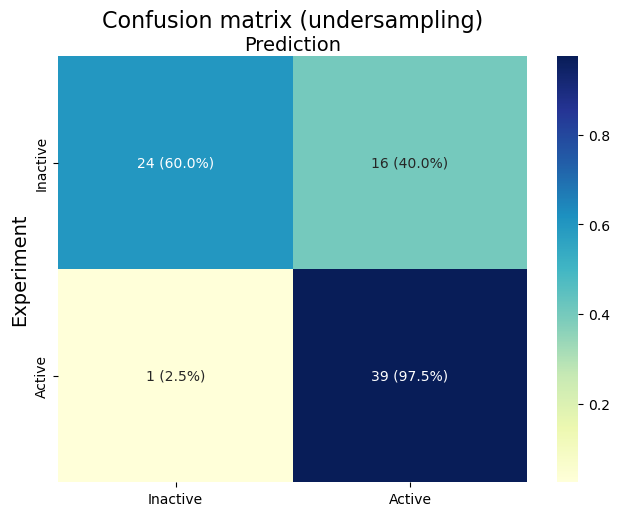

In [21]:
undersample = NearMiss(version=3)# From https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/ "The NearMiss-3 seems desirable, given that it will only keep those majority class examples that are on the decision boundary."
X_undersample, y_undersample = undersample.fit_resample(X, y)
activity_type_undersample = y_undersample


#Confusion matrix with underaampling:
y_pred_logit_undersample=logit.predict(X_undersample)
print("Undersampling:")
cv = KFold(n_splits=10, random_state=0, shuffle=True)
scores = cross_val_score(logit, X_undersample, y_undersample, scoring='accuracy', cv=cv, n_jobs=-1)
print('CV Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
mcc = matthews_corrcoef(y_undersample, y_pred_logit_undersample)
print("MCC", round(mcc*100)/100)
print("Accuracy:",round(metrics.accuracy_score(y_undersample, y_pred_logit_undersample)*100)/100)
print("Precision:",round(metrics.precision_score(y_undersample, y_pred_logit_undersample)*100)/100)
print("Recall:",round(metrics.recall_score(y_undersample, y_pred_logit_undersample)*100)/100)
y_proba_undersample = logit.predict_proba(X_undersample)[:,1][:,np.newaxis]
cnf_matrix = metrics.confusion_matrix(y_undersample, y_pred_logit_undersample)

cnf_matrix_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
group_percentages = ["{0:.1%}".format(value) for value in cnf_matrix_normalized.flatten()]
labels = [str(v1 + " ("+v2+")") for v1, v2 in zip(group_counts,group_percentages)] 
labels = np.asarray(labels).reshape(2,2)

%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_normalized), annot=labels, cmap="YlGnBu" ,fmt='')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix (undersampling)', fontsize=16)
class_names=["Inactive","Active"] # name  of classes
tick_marks=[0.5,1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Experiment', fontsize=14)
plt.xlabel('Prediction', fontsize=14)
plt.show()